Contents:
1. <a href=#data_dir>Set working dir and Clone from git hub(for first time)</a><br>
2. <a href=#data_pipeline>Data Pipeline</a><br>
3. <a href=#train>Train</a><br>
4. <a href=#results>Results</a>
5. <a href=#viz_differences>Visualizing Prediction differences at different softmaxes</a><br>
6. <a href=#viz_good_bad>Visualizing highly confidenct correct and incorrect predictions</a><br>


In [1]:
%tensorflow_version 1.x
import numpy as np

import tensorflow as tf

import numpy as np
import time, math
from tqdm import tqdm_notebook as tqdm


import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



<a name=data_dir></a>

# Data Directory Set Up. 
Clone from git if running for first time. Else git pull

In [2]:
import os
os.getcwd()
from google.colab import drive
import os
drive.mount('/content/gdrive')

#IF YOU ARE CLONING FOR THE FIRST TIME in colab please uncomment all the below 5 lines of code. 
#Put git user name and password in appropriate places

root_path = 'gdrive/My Drive/Colab Notebooks/' #change dir to folder where you want to clone
os.chdir('/content/' + root_path)
#!git clone https://<GIT_USERNAME>:<GIT_PASSWORD>@github.com/selfishhari/eva_research_team4.git



root_path = 'gdrive/My Drive/Colab Notebooks/eva_research_team4/src/' #change dir to your project folder's src

os.chdir('/content/' + root_path)
print(os.getcwd())

#!git branch -r | grep -v '\->' | while read remote; do git branch --track "${remote#origin/}" "$remote"; done
#!git checkout zeedense

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/eva_research_team4/src


In [3]:
!git branch
#YOU NEED TO BE ON "zeedense" branch

  augmentation
  by_bhuvn
  densenext
  development
  master
  newbranch
  tfrecords_fix
* zeedense


In [4]:
!git pull

Already up to date.


In [5]:
#from all_models import DavidNet


import run_util


from importlib import reload
reload(run_util)

from run_util import Run

import data_pipeline

reload(data_pipeline)

from zeedensenet import ZeeDenseNet

from augmentation_utils import cutout

Using TensorFlow backend.






32 conv0.10228609458439442 (3, 3) (1, 1) same (1, 1) None glorot_uniform
32 conv0.10228609458439442 (3, 3) (1, 1) same (1, 1) None glorot_uniform
32 conv0.10228609458439442 (3, 3) (1, 1) same (1, 1) None glorot_uniform


<a name=data_pipeline></a>

# Data Pipeline

In [6]:
data_pipeline.get_data(dataset_name = "CIFAR10", tfrecords_flag=True)

saving to tf records
Instructions for updating:
Please write your own downloading logic.
Generating ../data/train/train.tfrecords


Generating ../data/eval/eval.tfrecords
getting tf records complete


######

In [0]:
train_mean = np.array([125.30691805, 122.95039414, 113.86538318])

train_std= np.array([62.99321928, 62.08870764, 66.70489964])

normalize = lambda x: ((x - train_mean) / train_std)

def data_aug_train(x, y):
    
    #x = tf.image.per_image_standardization(x)
    
    x = normalize(x)
        
    #x = tf.image.random_flip_left_right(x)
    
    paddings = [(4, 4), (4, 4), (0, 0)]
    
    x = tf.pad(x, paddings, "REFLECT")
    
    x = tf.random_crop(x, [32, 32, 3])

    x = tf.image.random_flip_left_right(x)

    x = cutout(x)
    
    return (x, y)
  
def data_aug_test(x, y):
    
    #x = tf.image.per_image_standardization(x)
    
    x = normalize(x)
        
    #x = tf.image.random_flip_left_right(x)
    
    #paddings = [(4, 4), (4, 4), (0, 0)]
    
    #x = tf.pad(x, paddings, "REFLECT")
    
    #x = tf.random_crop(x, [32, 32, 3])
    
    return (x, y)

<a name=train></a>

# Train

In [0]:
obj = Run()

In [0]:
BATCH_SIZE = 128 #@param {type:"integer"}
MOMENTUM = 0.9 #@param {type:"number"}

MIN_MOMENTUM = 0.9 #@param {type:"number"}
LEARNING_RATE = 0.004 #@param {type:"number"}
WEIGHT_DECAY = 20e-4 #@param {type:"number"}
EPOCHS = 10 #@param {type:"integer"}

CLR_FLAG = 1 #@param {type:"integer"}
      
NUM_EPOCHS_PER_CYCLE = 4 #@param {type:"number"}

HIGHEST_LR_EPOCH = 24#@param {type:"integer"}


MIN_LEARNING_RATE = 0.0004 #@param {type:"number"}

END_LR_SMOOTHING_PERC = 0.15 #@param {type:"number"}

COMMENTS = "Davidnet multi_inference voting accuracy" #@param {type:"string"}


params_tune = {
    
  "epochs":EPOCHS, 
 
  "batch_size" : BATCH_SIZE,
    
  "num_epochs_per_cycle":NUM_EPOCHS_PER_CYCLE,
  
  "clr_flag":CLR_FLAG,

  "max_lr": LEARNING_RATE,

  "min_lr":MIN_LEARNING_RATE,

  "end_anneal_pc":END_LR_SMOOTHING_PERC,

  "max_mom":MOMENTUM,
 
  "min_mom":MIN_MOMENTUM,
    
  "highest_lr_epoch" : HIGHEST_LR_EPOCH,
 
  "wd":WEIGHT_DECAY,
  
  "skip_testing_epochs":0,
    
  "batches_per_epoch":50000//BATCH_SIZE,
    
  "comments":COMMENTS
}

In [0]:
loaded_tfrecs = data_pipeline.load_tfrecords(params_tune["batch_size"])

train_dataset = loaded_tfrecs["train"]

eval_dataset = loaded_tfrecs["eval"]

In [0]:
def tst_data_supplier(epoch_num):
    
    batch_size = params_tune["batch_size"]
    
    global eval_dataset
  
    len_test = 10000

    test_set = eval_dataset.map(data_aug_test).batch(batch_size).prefetch(1)
    
    return (test_set, len_test)

def trn_data_supplier(epoch_num):
    
    batch_size = params_tune["batch_size"]
  
    global train_dataset
    
    len_train = 50000

    train_set = train_dataset.map(data_aug_train).shuffle(len_train).batch(batch_size).prefetch(1)
    
    return (train_set, len_train)

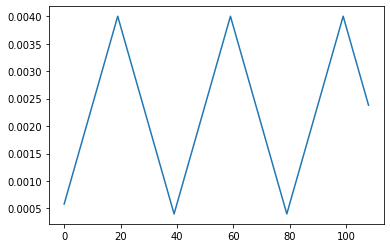

In [12]:
obj.plot_lr(params_tune)

In [13]:
#import cProfile
model2 = ZeeDenseNet(f_filter=64,  
                     dimensions_dict= {"dimensions_to_sample":(8,8)}, 
                     gap_mode="x_axis",
                     layers_filters={0:64},
                    multisoft_list = [0, 1, 2],
                     roots_flag=False,
                     residuals_flag=False
                    )
x = obj.run(params_tune, trn_data_supplier, tst_data_supplier, model = model2)

64 0.4968946919357914conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
128 0.7438914007033681conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
128 0.566252878449996conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
128 0.9315200786552841conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
256 0.43074613904046666conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
256 0.9127647343733685conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
256 0.1711241358442246conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
512 0.5909079677120835conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
512 0.6874283273442251conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
512 0.33842835092584156conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
64 0.11078429122946387conv (3, 3) (1, 1) same (2, 2) None glorot_uniform
64 0.5380609163826127conv (1, 1) (1, 1) same (2, 2) None glorot_uniform



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
epoch: 1 lr: 0.0022 train loss: 2.463 train acc:0.488 val loss: 1.873 val acc: 0.624 time:286.674
epoch: 2 lr: 0.004 train loss: 1.575 train acc:0.687 val loss: 2.072 val acc: 0.612 time:563.445
epoch: 3 lr: 0.0022 train loss: 1.203 train acc:0.772 val loss: 1.170 val acc: 0.773 time:841.640
epoch: 4 lr: 0.0004 train loss: 1.004 train acc:0.818 val loss: 0.870 val acc: 0.852 time:1119.850
epoch: 5 lr: 0.0022 train loss: 0.856 train acc:0.853 val loss: 0.763 val acc: 0.872 time:1397.125
epoch: 6 lr: 0.004 train loss: 0.767 train acc:0.875 val loss: 0.707 val acc: 0.883 time:1673.728
epoch: 7 lr: 0.0022 train loss: 0.731 train acc:0.884 val loss: 0.704 val acc: 0.884 time:1950.823
epoch: 8 lr: 0.0004 train loss: 0.729 train acc:0.885 val loss: 0.705 val acc: 0.884 time:2227.954
epoch: 9 lr: 0.0022 train loss: 0.730 train acc:0.885 val loss: 0.704 val acc: 0.884 time:2505.124
epoch: 10 lr: 0.004

<a name=results></a>

# Results

In [30]:
early_inf_df = run_util.early_inference_accuracy(obj.model,test_dataset = tst_data_supplier)

early_inf_df

sm_level  accuracy    loss  inference_time
0      sm1  0.795680  0.7200        0.000289
1      sm2  0.433155  0.8560        0.000664
2      sm3  0.337036  0.8848        0.001355

In [0]:
import visual_utils
reload(visual_utils)
#diff_df = visual_utils.grab_different_imgs(obj.model, trn_data_supplier)

all_df = visual_utils.grab_different_imgs(obj.model, trn_data_supplier, difference=False)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
diff_df = all_df

diff_df["subset_diff"] = False

diff_df["subset_diff"] = (diff_df["subset_diff"]) | (diff_df.sm1_correct != diff_df.sm3_correct)

diff_df["subset_diff"] = (diff_df["subset_diff"]) | (diff_df.sm2_correct != diff_df.sm3_correct)

diff_df = diff_df.loc[diff_df.subset_diff==True,:].copy()

In [32]:
all_df.head(3)

ys  subset  ...                                               imgs  subset_diff
0   9    True  ...  [[[2.0429673, 1.8851997, 1.7410207], [2.058842...         True
1   3    True  ...  [[[-0.5763623, -0.38574475, -0.6126294], [-0.5...        False
2   0    True  ...  [[[0.677741, 1.0799001, 1.3662356], [0.4554948...        False

[3 rows x 13 columns]

Final confusion matrix-at softmax3


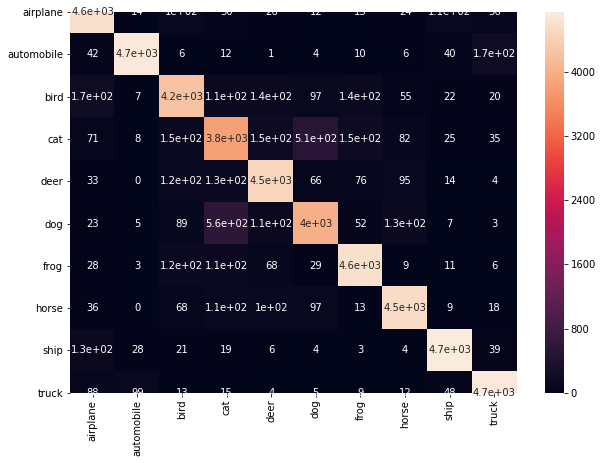

In [33]:
print("Final confusion matrix-at softmax3")
visual_utils.plot_cm(all_df.ys, all_df.sm3_class)

Confusion matrix-at softmax1


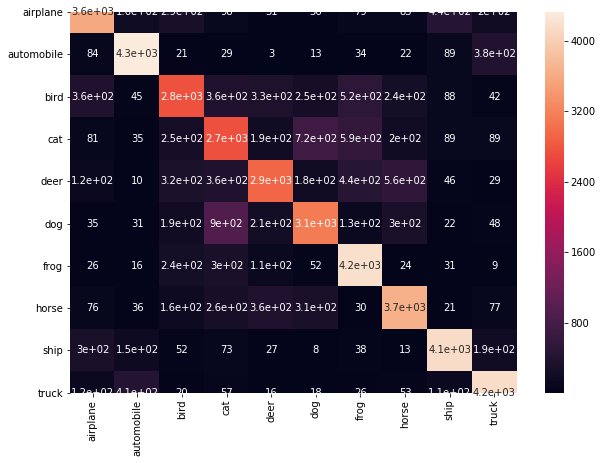

In [34]:
print("Confusion matrix-at softmax1")
visual_utils.plot_cm(all_df.ys, all_df.sm1_class)

Confusion matrix-at softmax2


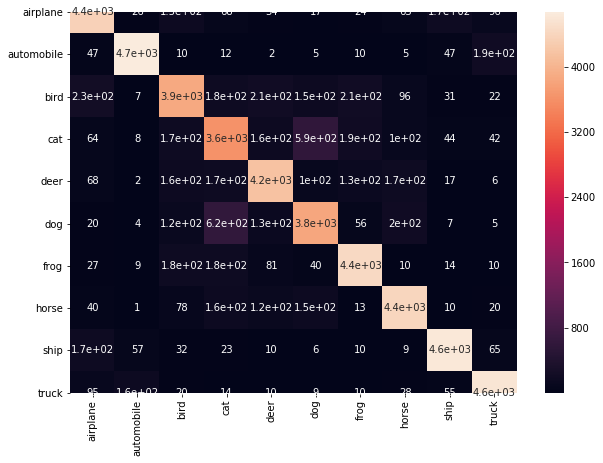

In [35]:
print("Confusion matrix-at softmax2")
visual_utils.plot_cm(all_df.ys, all_df.sm2_class)

**Voting accuracy**

In [36]:
print("Accuracy calculated by voting results from 3 softmaxes.\n \
Mode of predicted class is taken, if all3 are different then the last softmax prediction is taken\n")
run_util.voting_accuracy(df=all_df, true_col="ys", sm_class_colnames = ["sm1_class", "sm2_class", "sm3_class"])

Accuracy calculated by voting results from 3 softmaxes.
 Mode of predicted class is taken, if all3 are different then the last softmax prediction is taken



0.86674

<a name=viz_differences></a>

# Visualizing Images. Difference b/w softmax1 and softmax3

This set of viz has images with the following property

1. All images where softmax1 is doing incorrectly but softmax3 is correct
2. All images where softmax1 is doing correctly but softmax3 is not



These are plotted one next to other for each class

last softmax is softmax3, considered softmax is softmax1
predicted1 and prob1-softmax1
predicted2 and prob2-softmax2
predicted3 and prob3-softmax3


Class: dog-images that are correct at last softmax but not at considered softmax



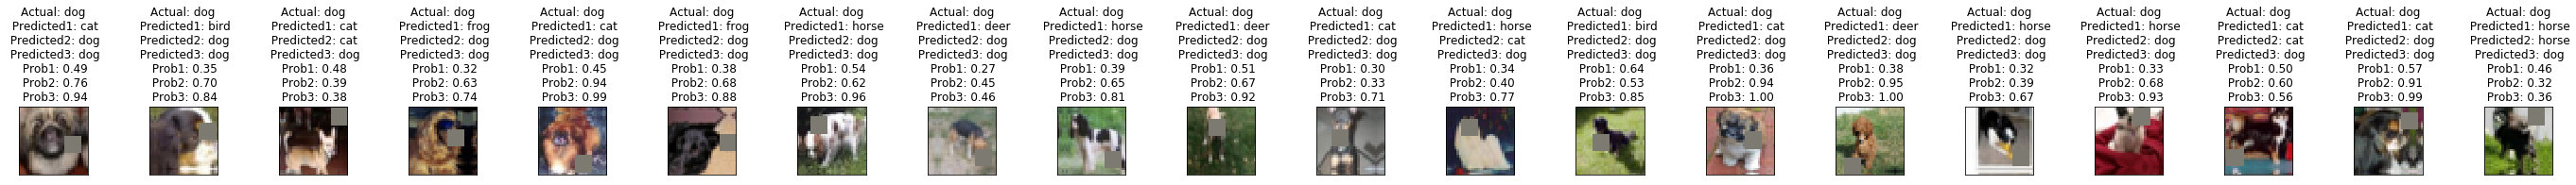


Class: dog-images that are correct at considered softmax but not at last softmax



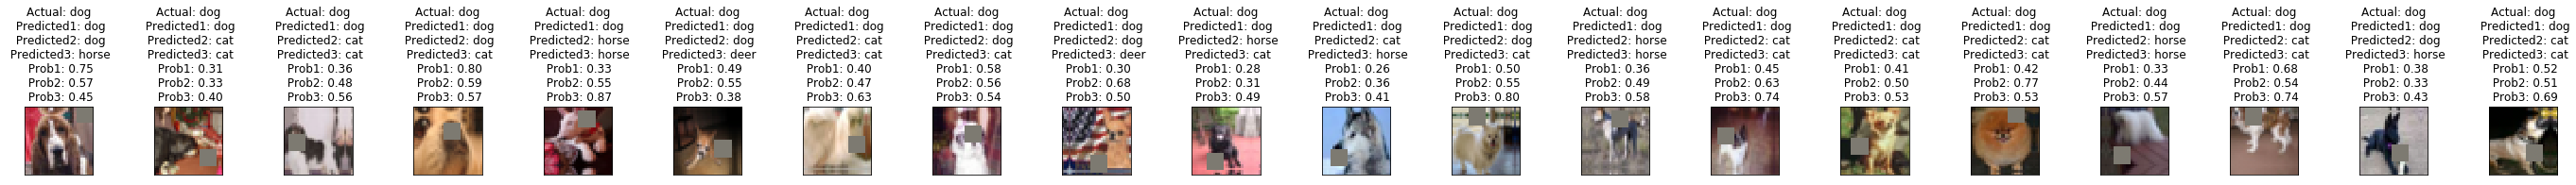


Class: deer-images that are correct at last softmax but not at considered softmax



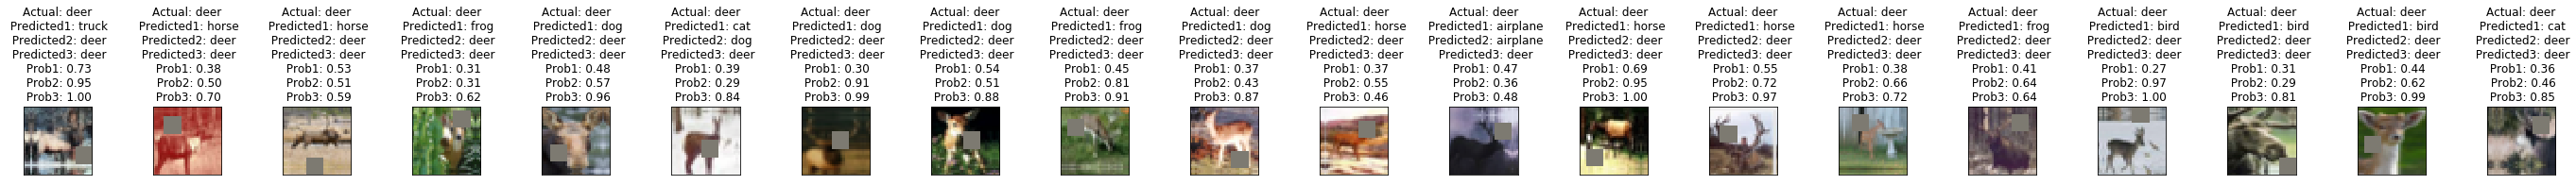


Class: deer-images that are correct at considered softmax but not at last softmax



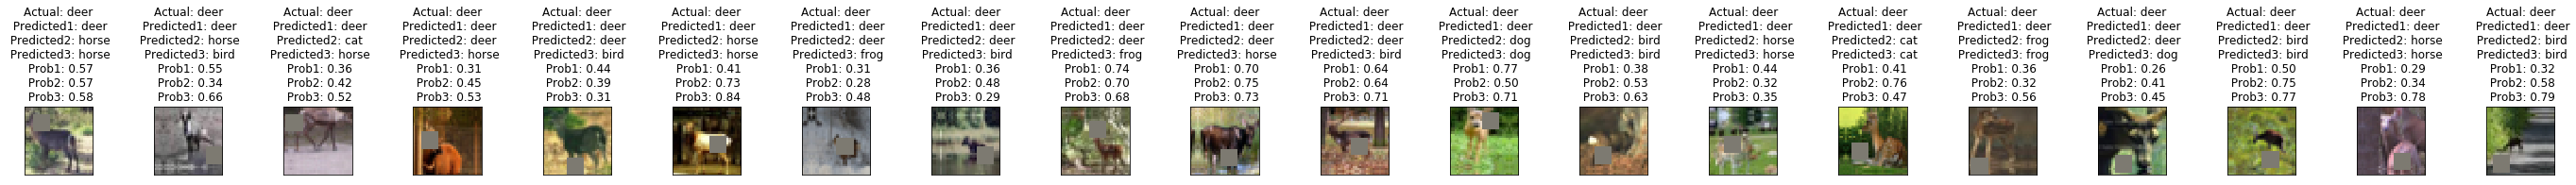


Class: ship-images that are correct at last softmax but not at considered softmax



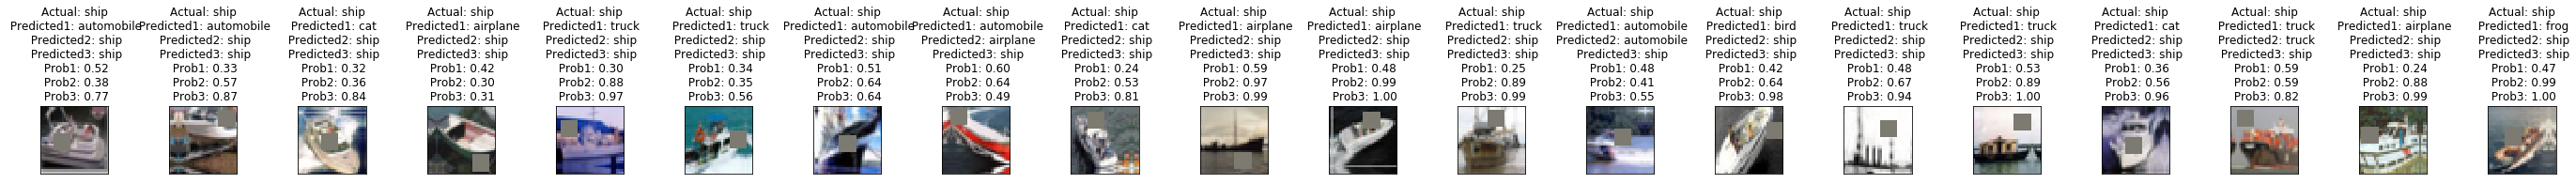


Class: ship-images that are correct at considered softmax but not at last softmax



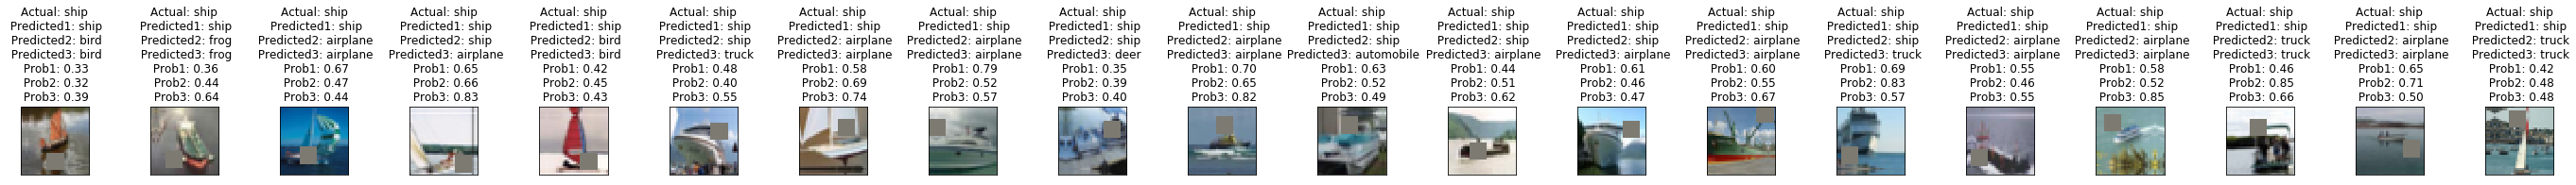


Class: bird-images that are correct at last softmax but not at considered softmax



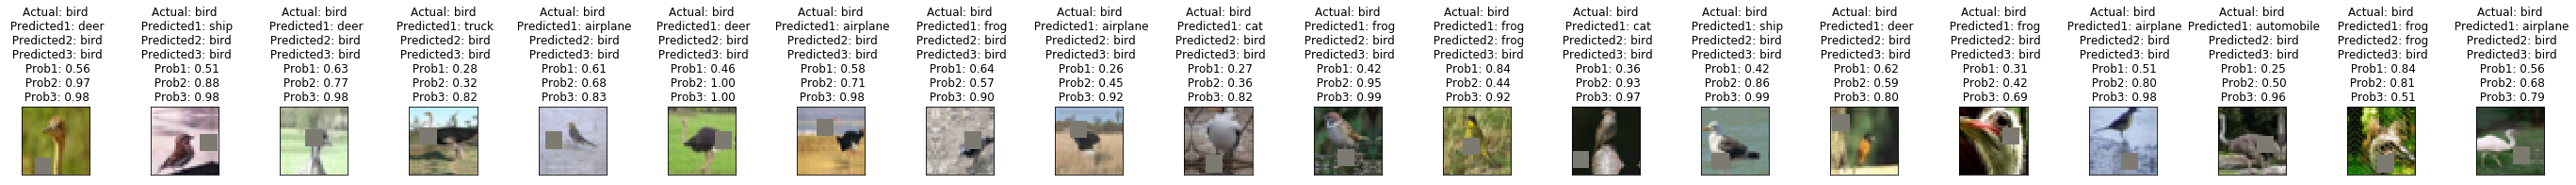


Class: bird-images that are correct at considered softmax but not at last softmax



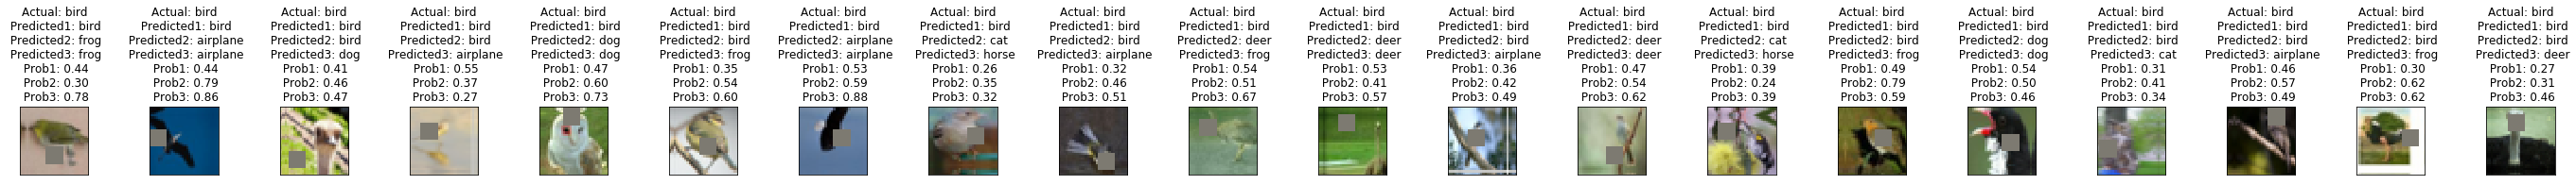


Class: airplane-images that are correct at last softmax but not at considered softmax



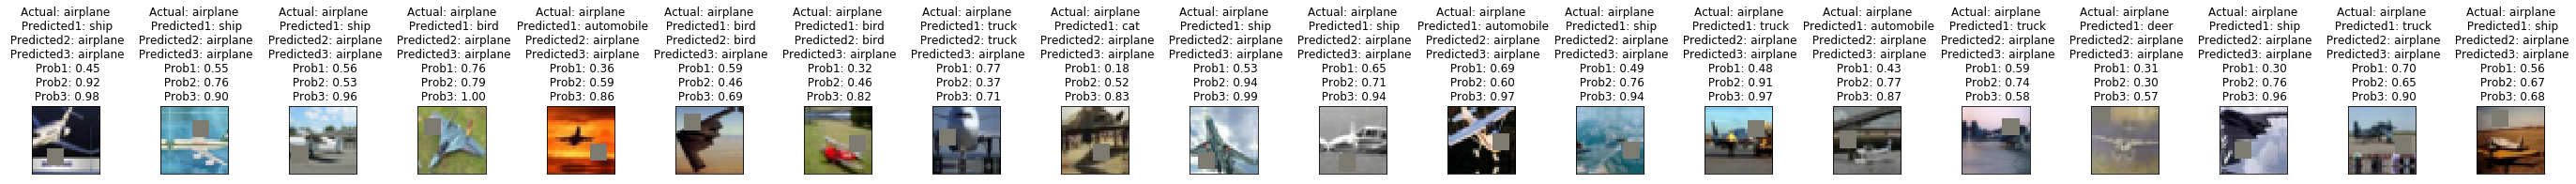


Class: airplane-images that are correct at considered softmax but not at last softmax



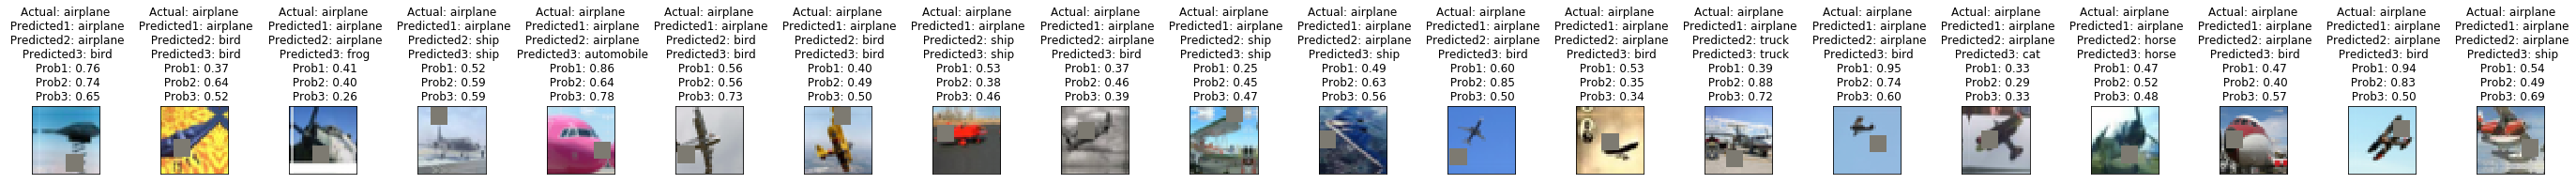


Class: frog-images that are correct at last softmax but not at considered softmax



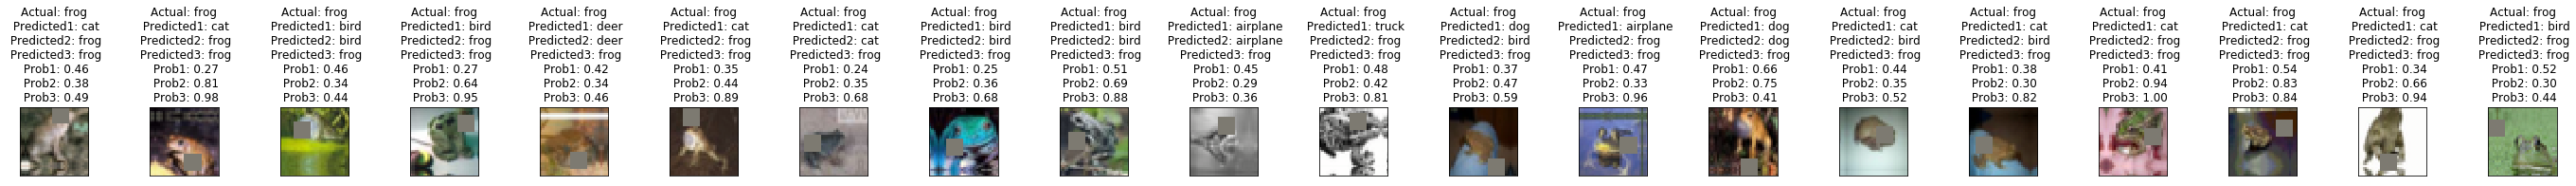


Class: frog-images that are correct at considered softmax but not at last softmax



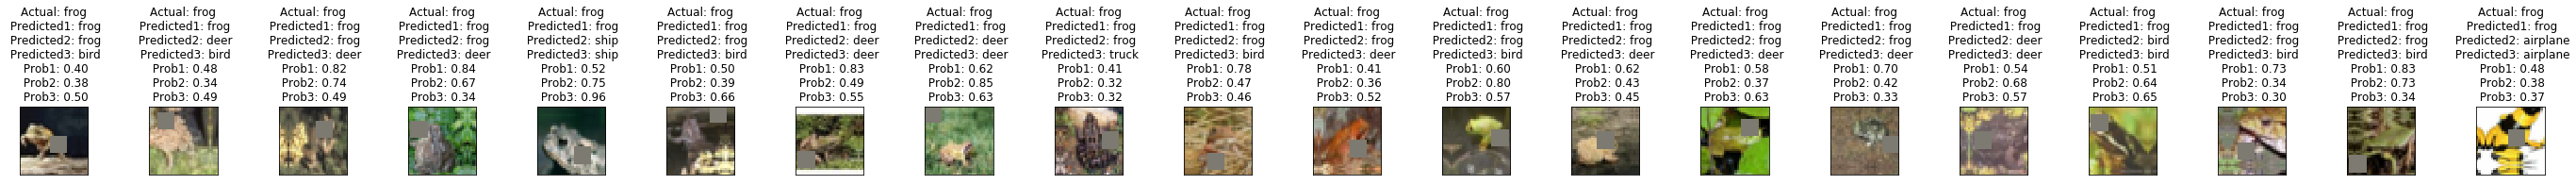


Class: cat-images that are correct at last softmax but not at considered softmax



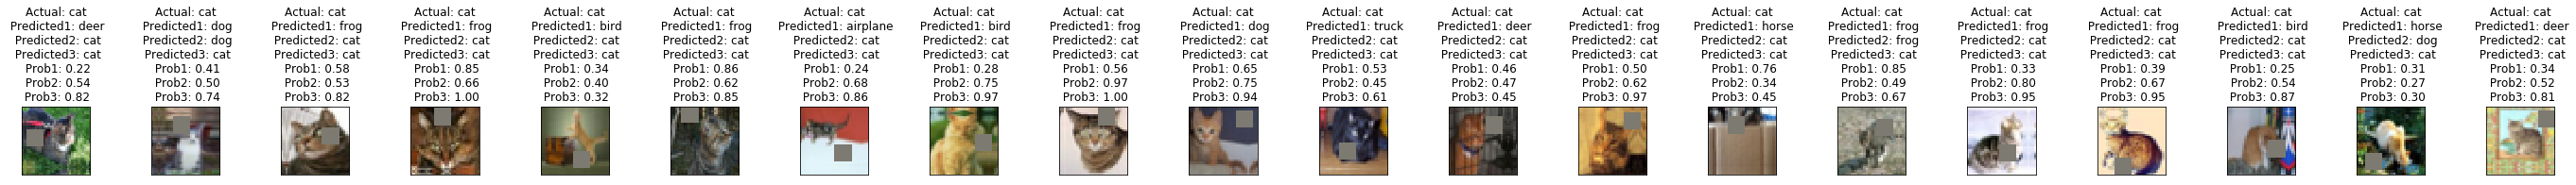


Class: cat-images that are correct at considered softmax but not at last softmax



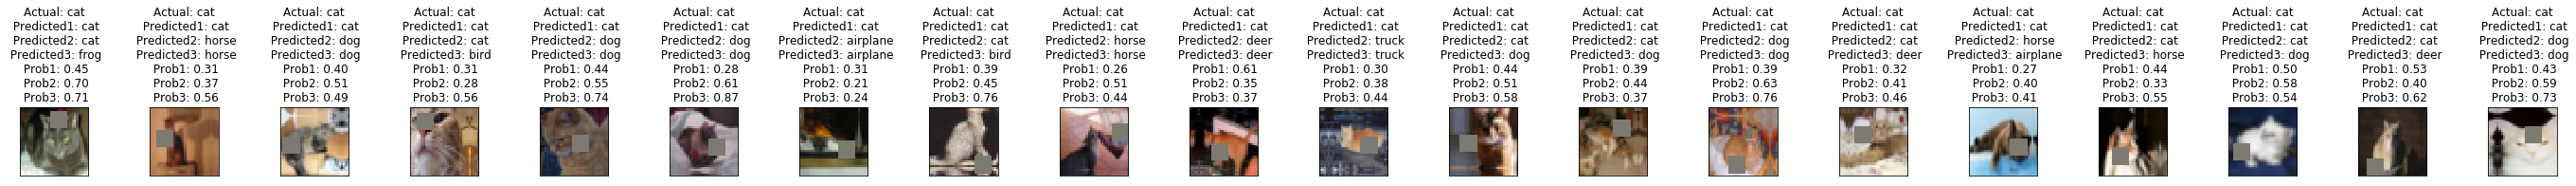


Class: horse-images that are correct at last softmax but not at considered softmax



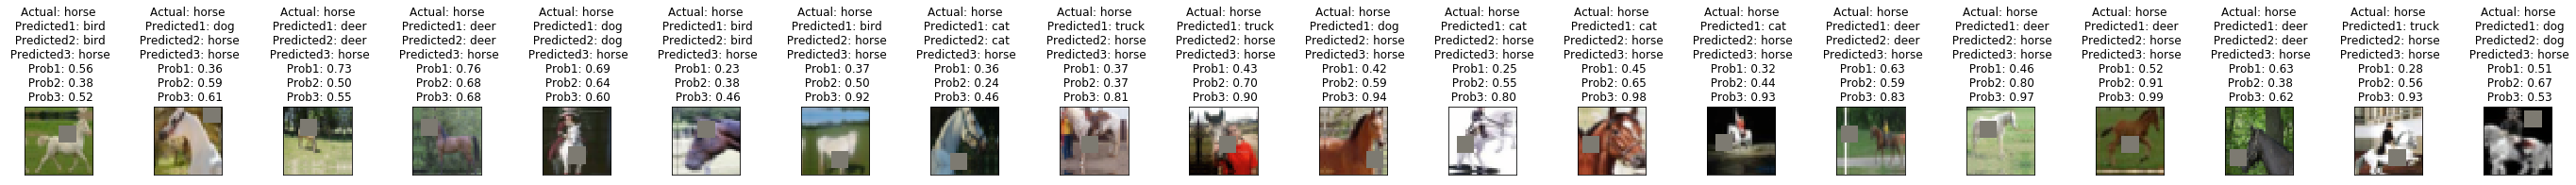


Class: horse-images that are correct at considered softmax but not at last softmax



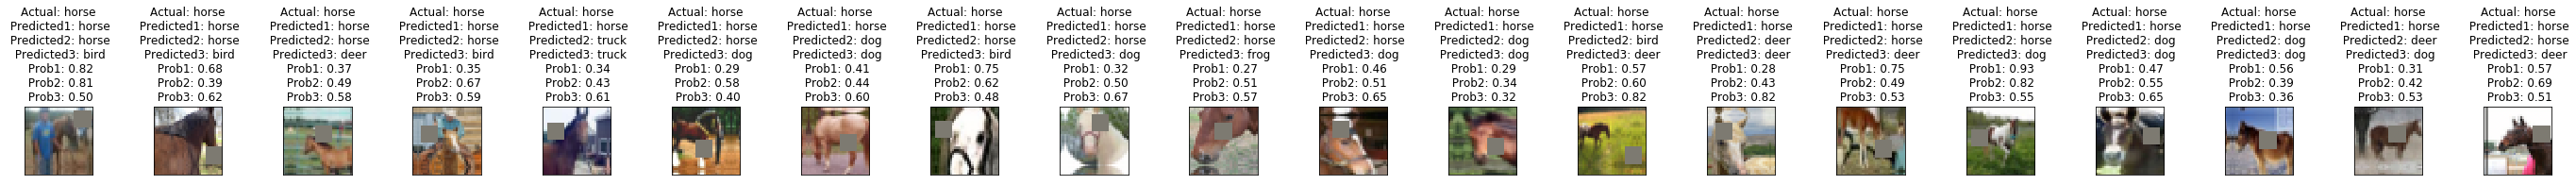


Class: automobile-images that are correct at last softmax but not at considered softmax



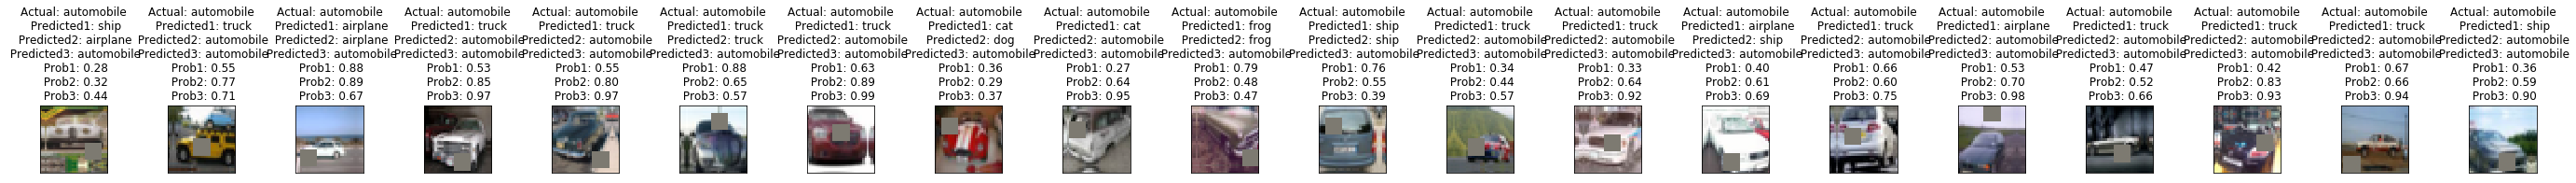


Class: automobile-images that are correct at considered softmax but not at last softmax



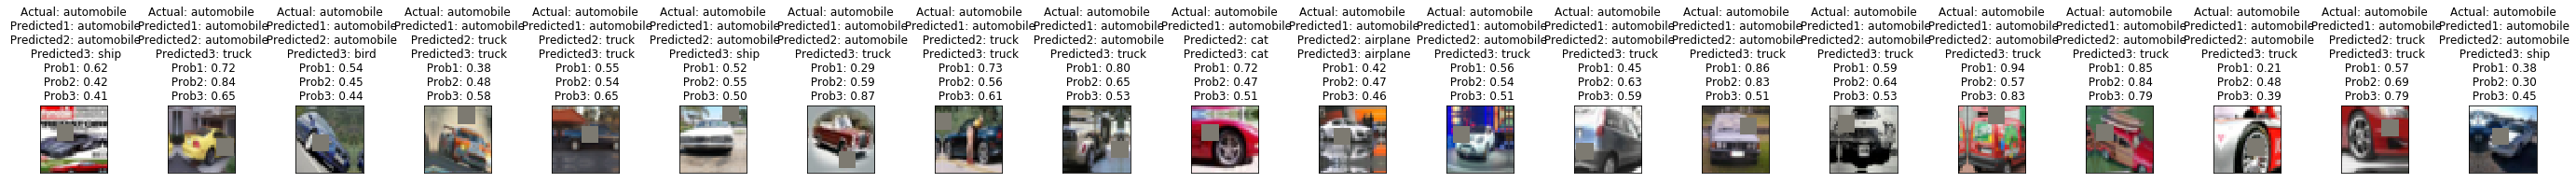


Class: truck-images that are correct at last softmax but not at considered softmax



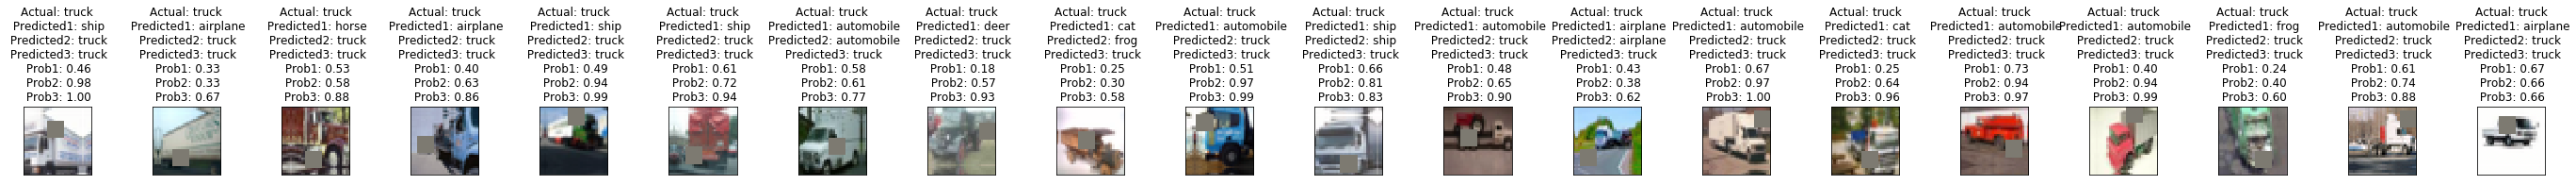


Class: truck-images that are correct at considered softmax but not at last softmax



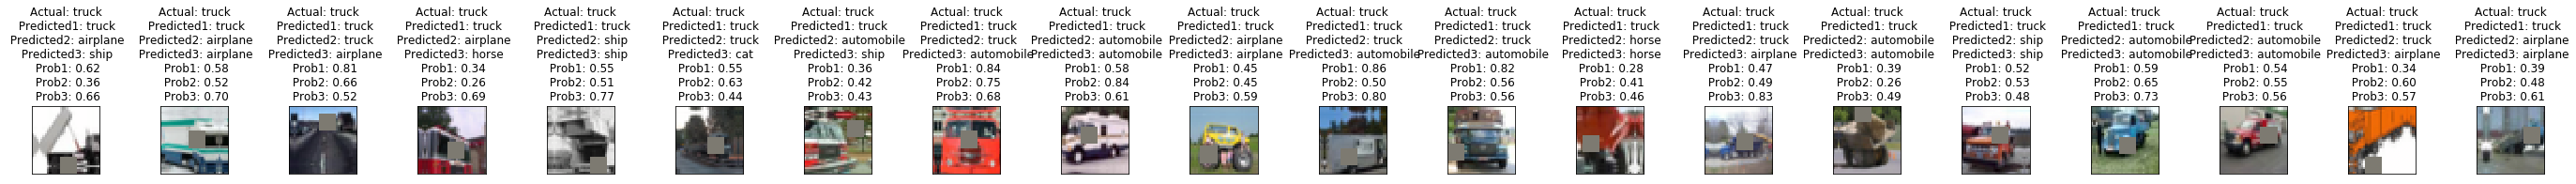

In [21]:
print("last softmax is softmax3, considered softmax is softmax1\n\
predicted1 and prob1-softmax1\n\
predicted2 and prob2-softmax2\n\
predicted3 and prob3-softmax3\n\
")
visual_utils.plot_diff(diff_df, sm_col="sm1_correct", main_col="sm3_correct",
                       denormalize=True, ncols=20)

# Visualizing Images. Difference b/w softmax2 and softmax3

This set of viz has images with the following property

1. All images where softmax2 is doing incorrectly but softmax3 is correct
2. All images where softmax2 is doing correctly but softmax3 is not



These are plotted one next to other for each class

last softmax is softmax3, considered softmax is softmax2
predicted1 and prob1-softmax1
predicted2 and prob2-softmax2
predicted3 and prob3-softmax3


Class: cat-images that are correct at last softmax but not at considered softmax



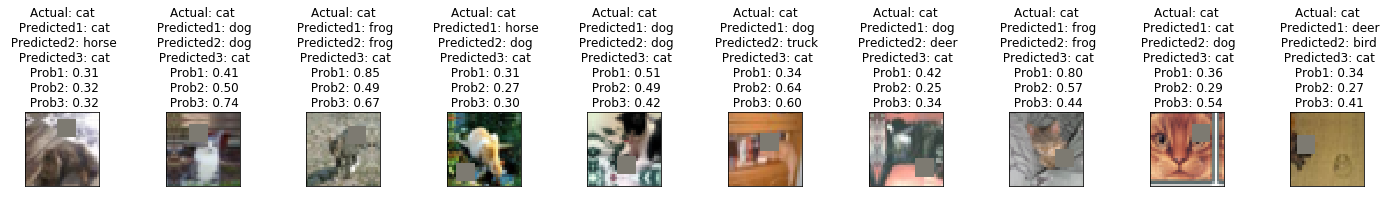


Class: cat-images that are correct at considered softmax but not at last softmax



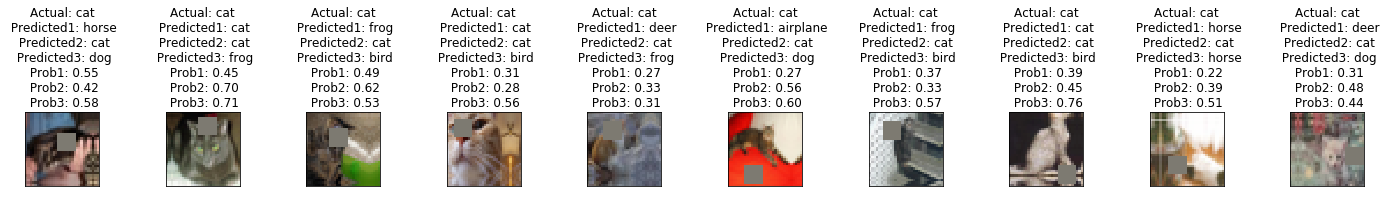


Class: truck-images that are correct at last softmax but not at considered softmax



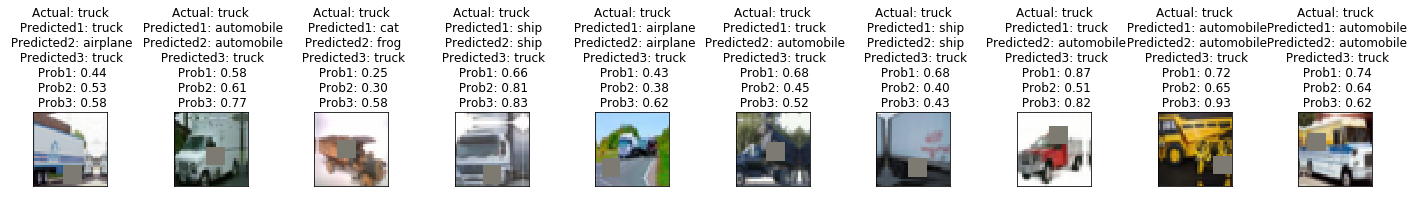


Class: truck-images that are correct at considered softmax but not at last softmax



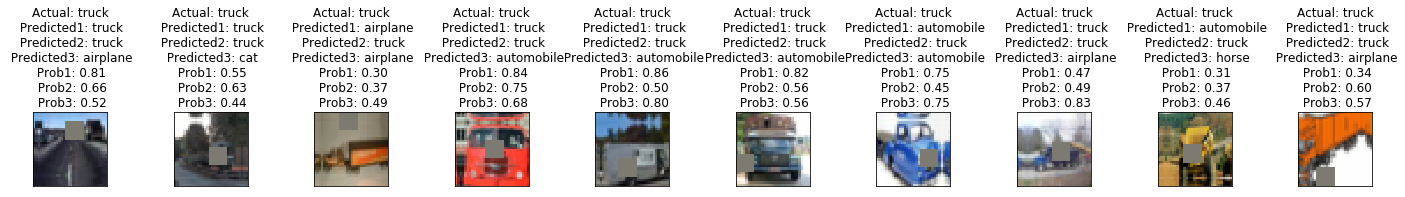


Class: horse-images that are correct at last softmax but not at considered softmax



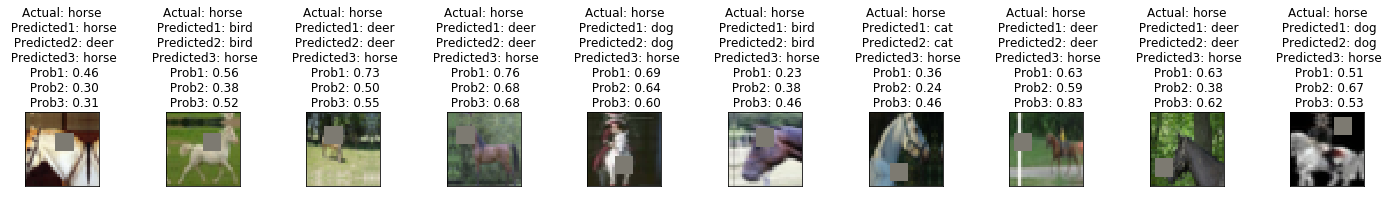


Class: horse-images that are correct at considered softmax but not at last softmax



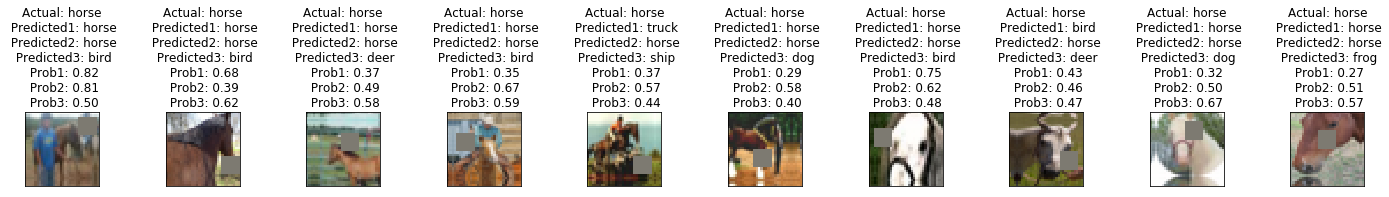


Class: dog-images that are correct at last softmax but not at considered softmax



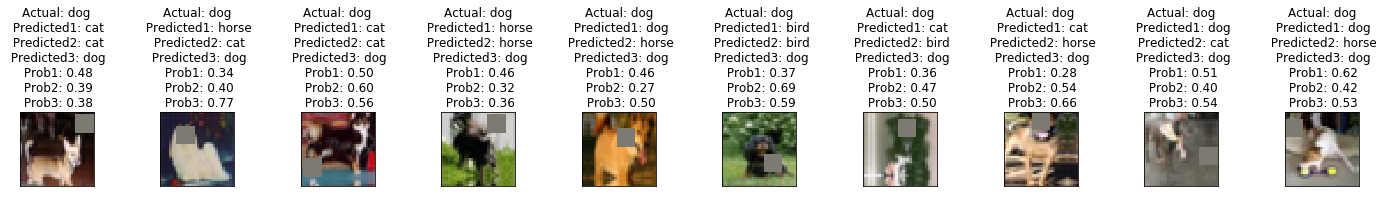


Class: dog-images that are correct at considered softmax but not at last softmax



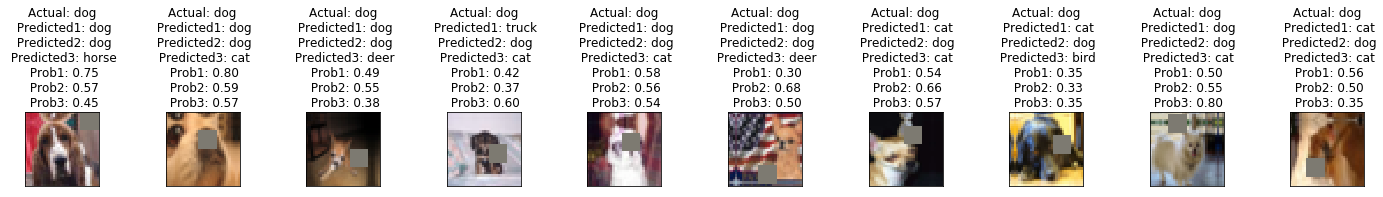


Class: deer-images that are correct at last softmax but not at considered softmax



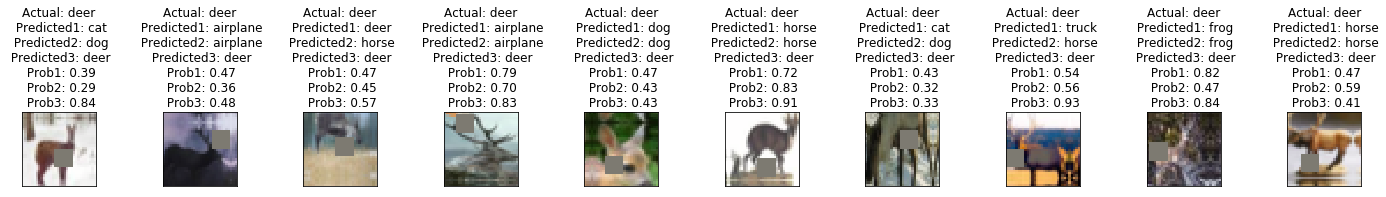


Class: deer-images that are correct at considered softmax but not at last softmax



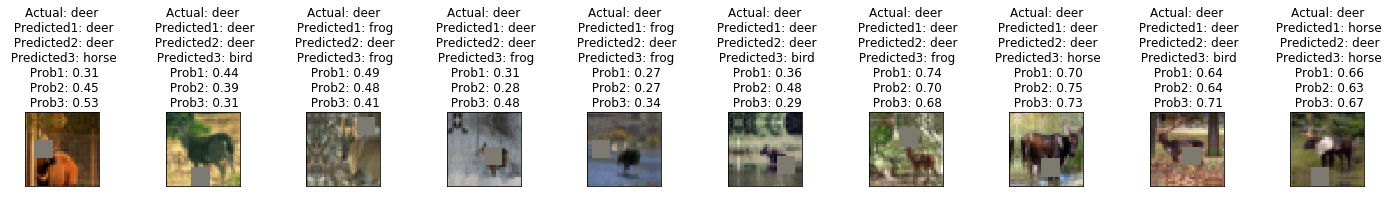


Class: automobile-images that are correct at last softmax but not at considered softmax



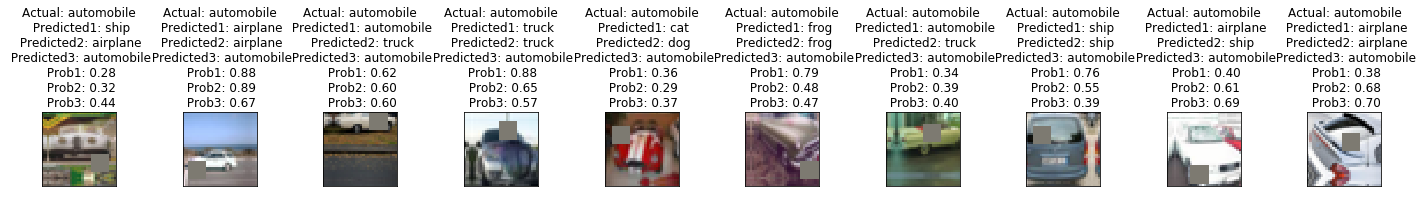


Class: automobile-images that are correct at considered softmax but not at last softmax



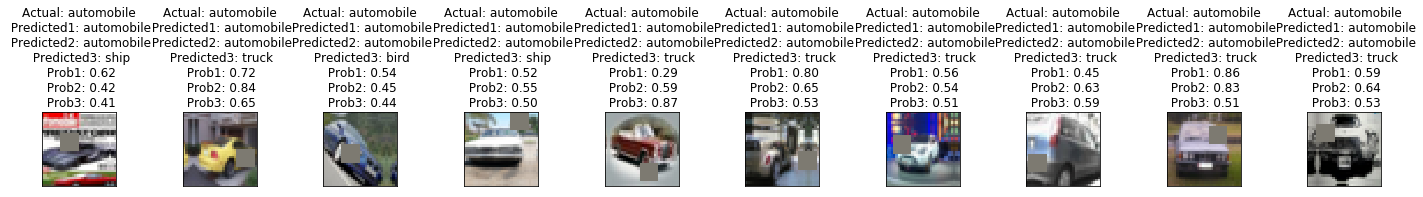


Class: airplane-images that are correct at last softmax but not at considered softmax



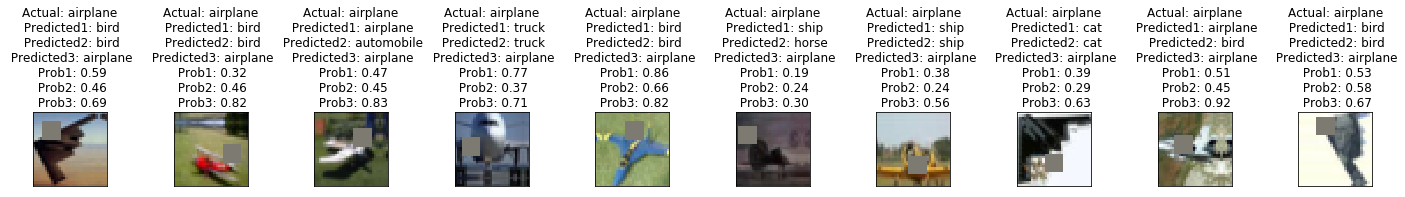


Class: airplane-images that are correct at considered softmax but not at last softmax



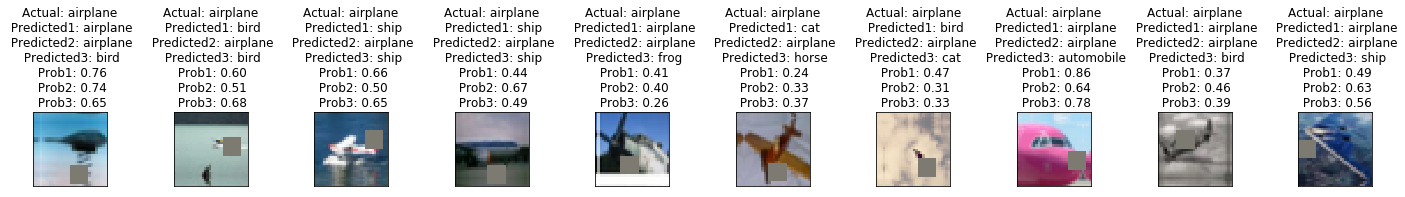


Class: frog-images that are correct at last softmax but not at considered softmax



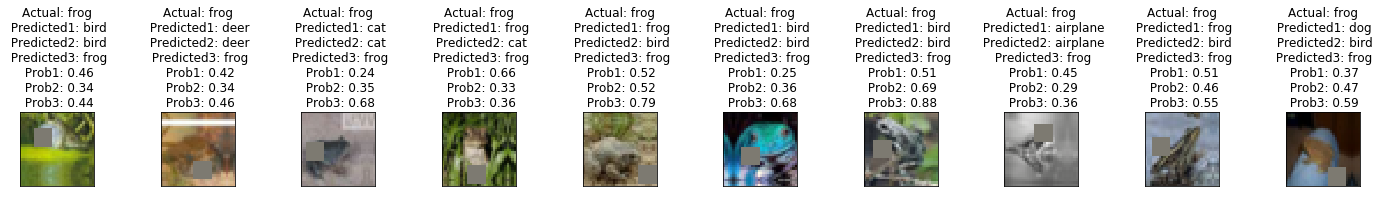


Class: frog-images that are correct at considered softmax but not at last softmax



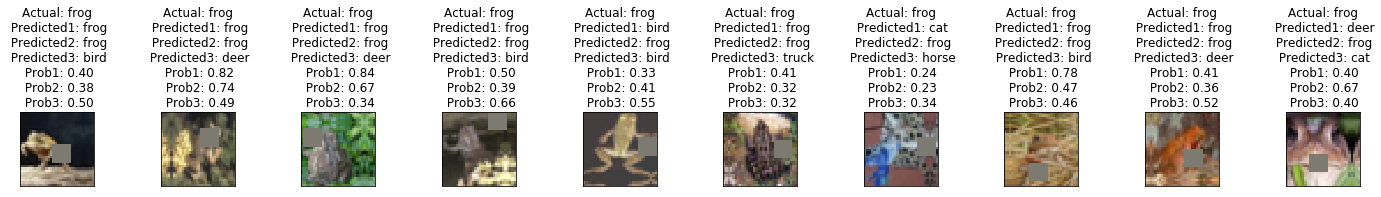


Class: bird-images that are correct at last softmax but not at considered softmax



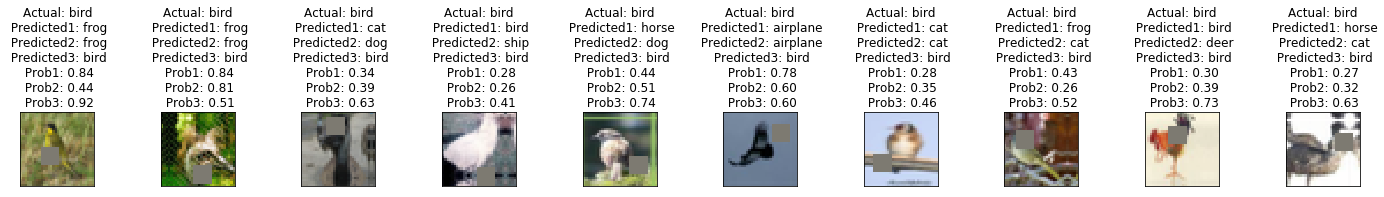


Class: bird-images that are correct at considered softmax but not at last softmax



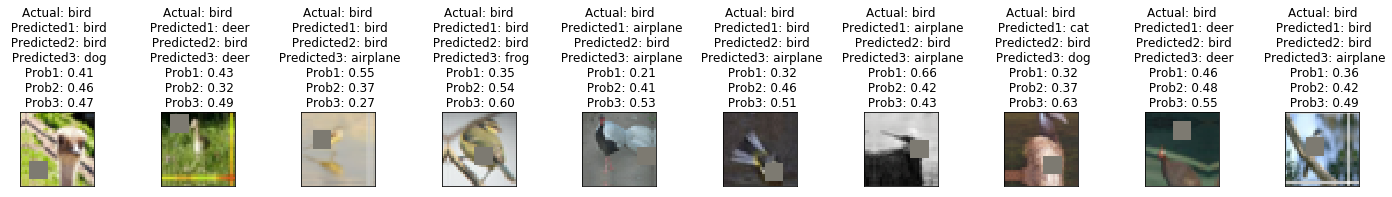


Class: ship-images that are correct at last softmax but not at considered softmax



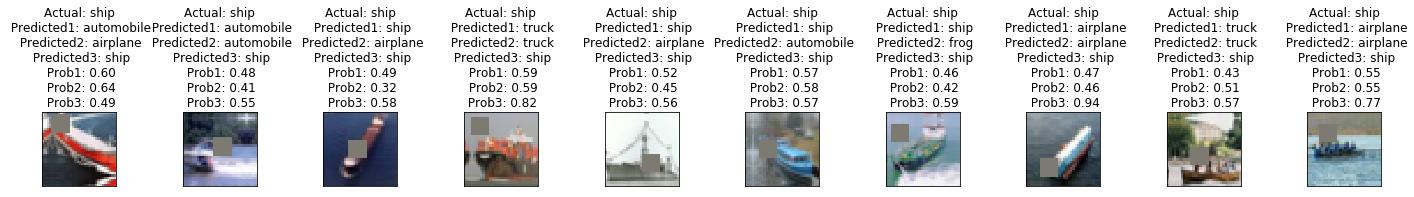


Class: ship-images that are correct at considered softmax but not at last softmax



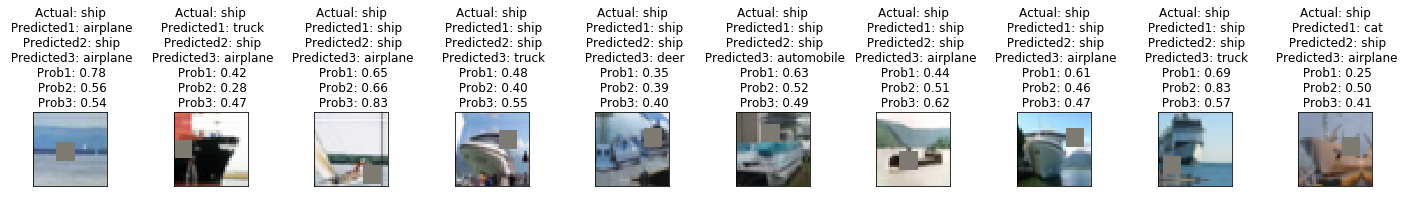

In [22]:
print("last softmax is softmax3, considered softmax is softmax2\n\
predicted1 and prob1-softmax1\n\
predicted2 and prob2-softmax2\n\
predicted3 and prob3-softmax3\n\
")

visual_utils.plot_diff(diff_df,
                       sm_col="sm2_correct", main_col="sm3_correct",
                       img_col="imgs",
              true_col="ys", 
              ncols=10,
              denormalize=True)

<a name=viz_good_bad></a>

# Good and Worse Predictions
In this set of viz, images have following properties

1. For a given softmax, predictions that are both correct and have high probability(Highly confident correct predictions)

2. For a given softmax, predictions that are highly confident but for a wrong class.

These are plotted row by for each class

In [23]:
!git pull
reload(visual_utils)

Already up to date.


<module 'visual_utils' from '/content/gdrive/My Drive/Colab Notebooks/eva_research_team4/src/visual_utils.py'>

**Softmax1- Good and worse predictions**

(2000, 14) (2000, 14)

Class: truck-Correct with high confidence



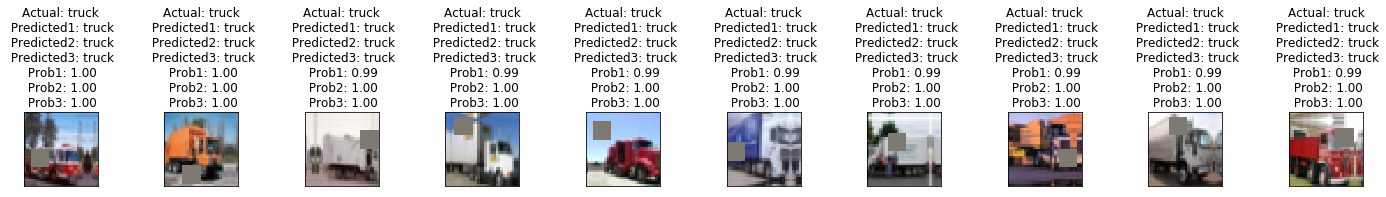


Class: truck-Incorrect with high confidence



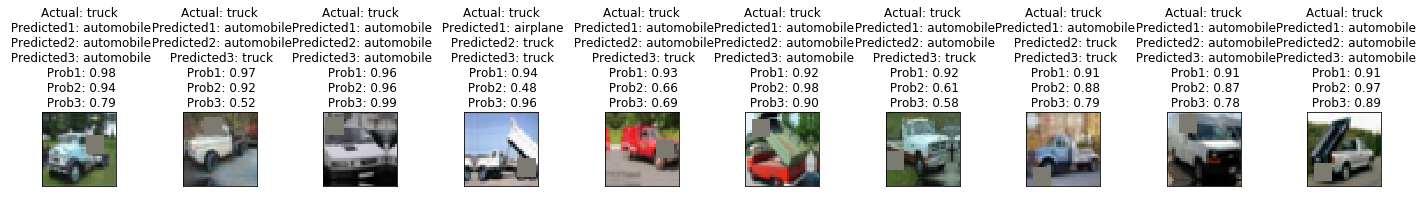


Class: ship-Correct with high confidence



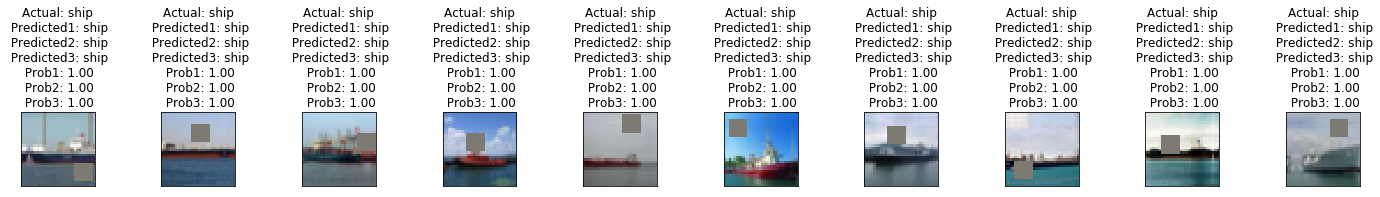


Class: ship-Incorrect with high confidence



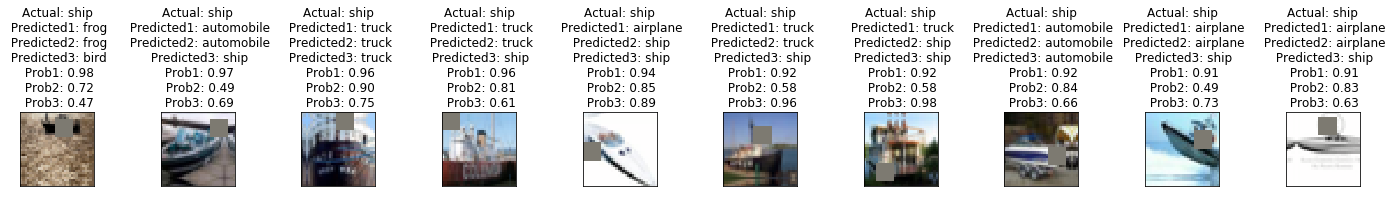


Class: horse-Correct with high confidence



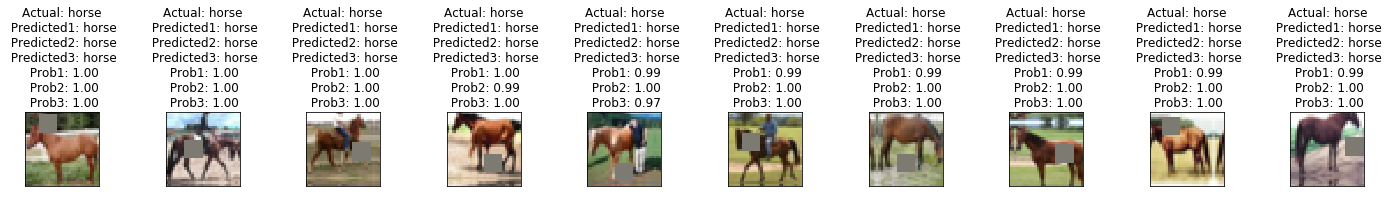


Class: horse-Incorrect with high confidence



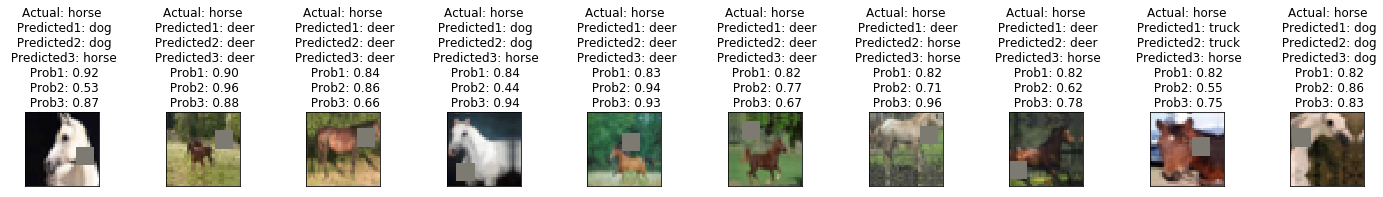


Class: frog-Correct with high confidence



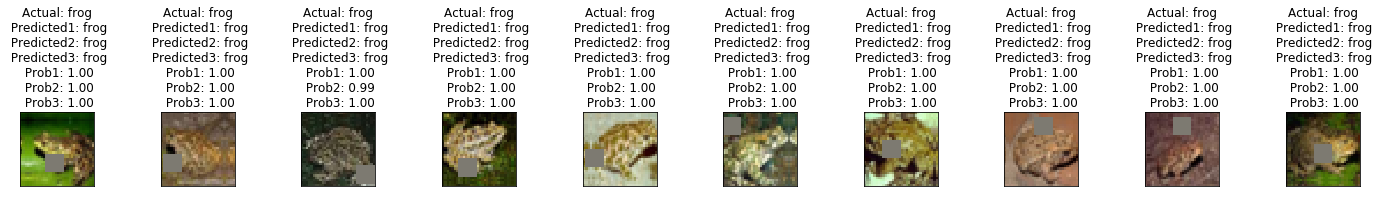


Class: frog-Incorrect with high confidence



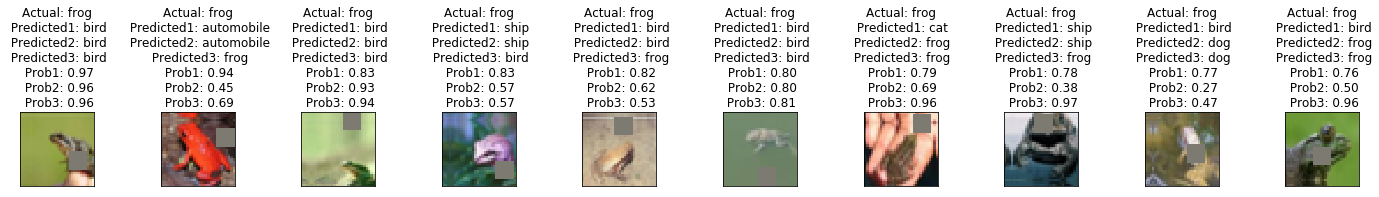


Class: dog-Correct with high confidence



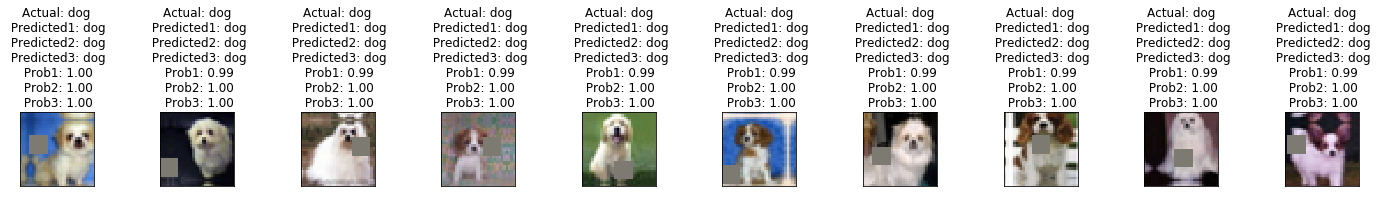


Class: dog-Incorrect with high confidence



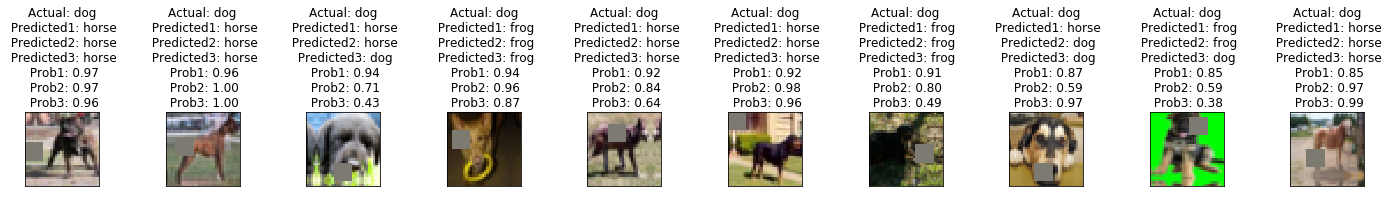


Class: deer-Correct with high confidence



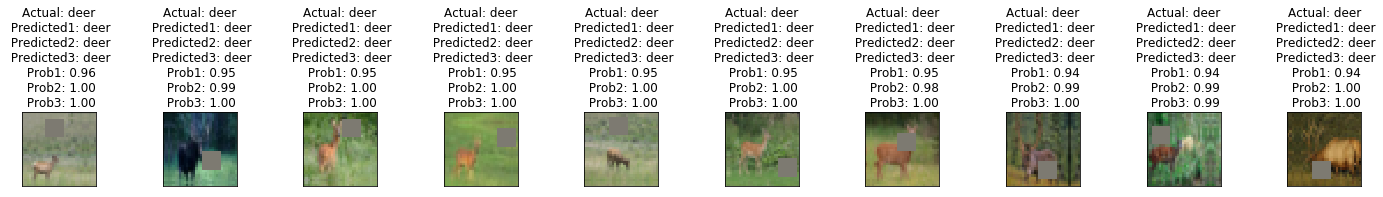


Class: deer-Incorrect with high confidence



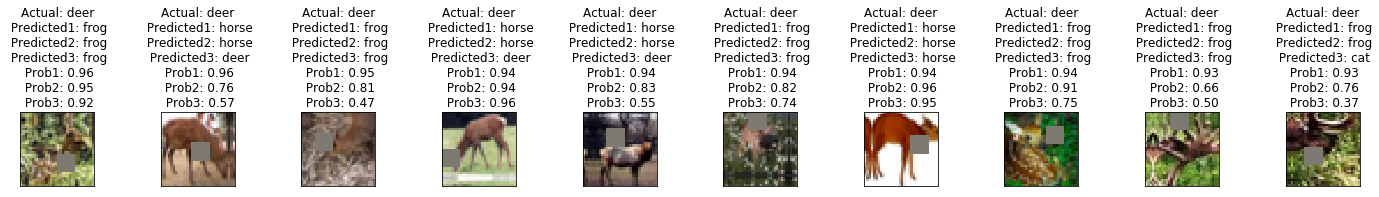


Class: cat-Correct with high confidence



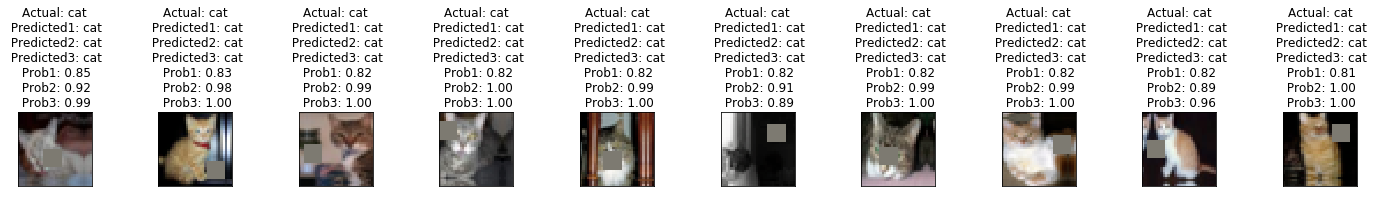


Class: cat-Incorrect with high confidence



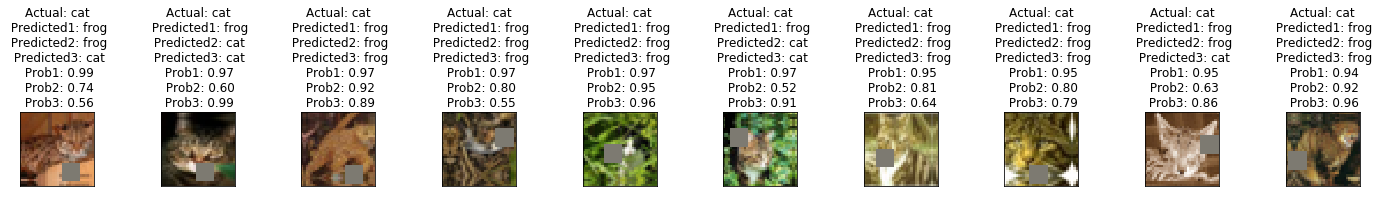


Class: bird-Correct with high confidence



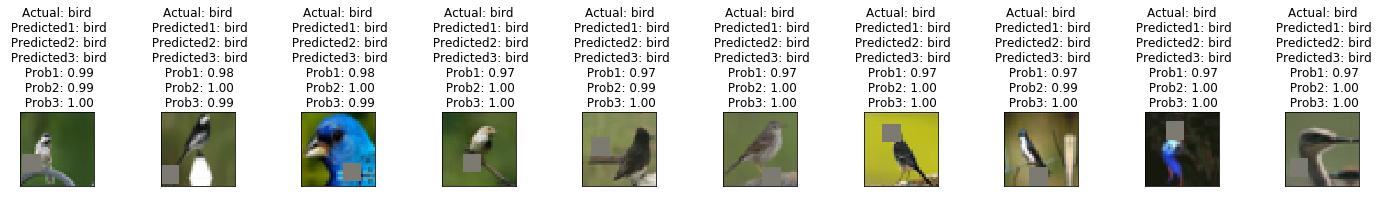


Class: bird-Incorrect with high confidence



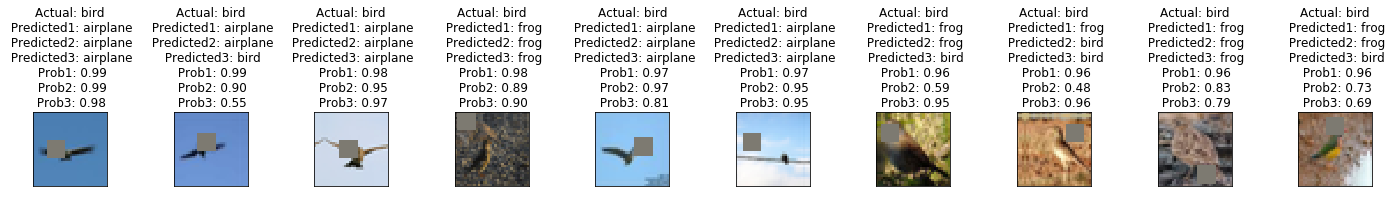


Class: automobile-Correct with high confidence



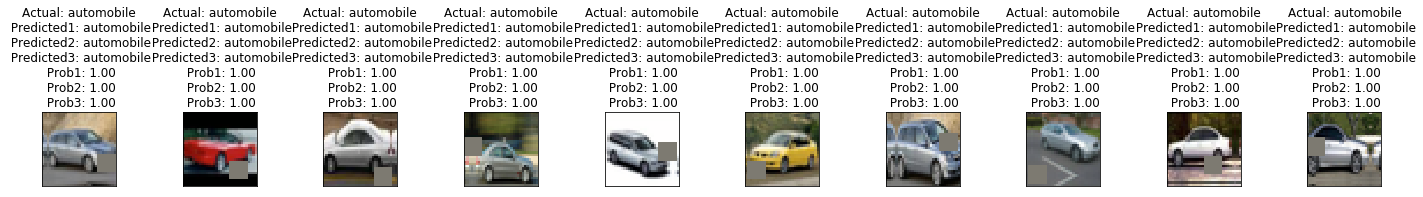


Class: automobile-Incorrect with high confidence



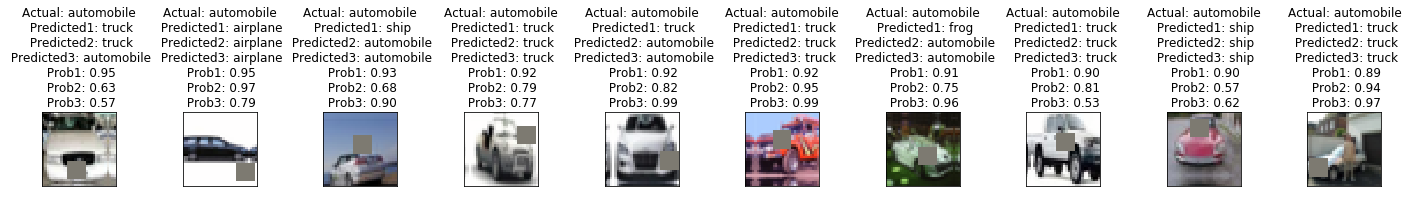


Class: airplane-Correct with high confidence



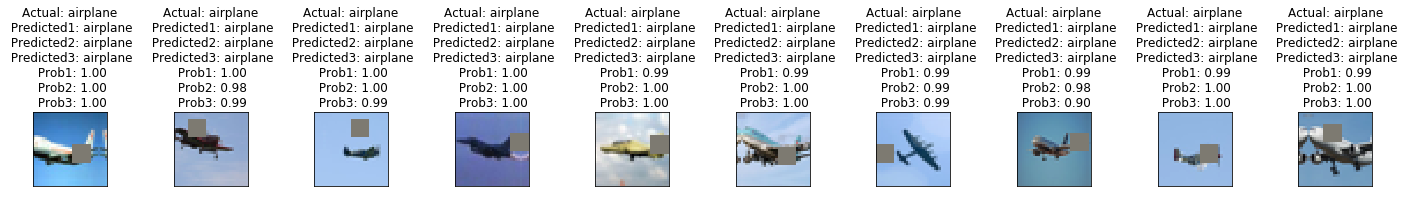


Class: airplane-Incorrect with high confidence



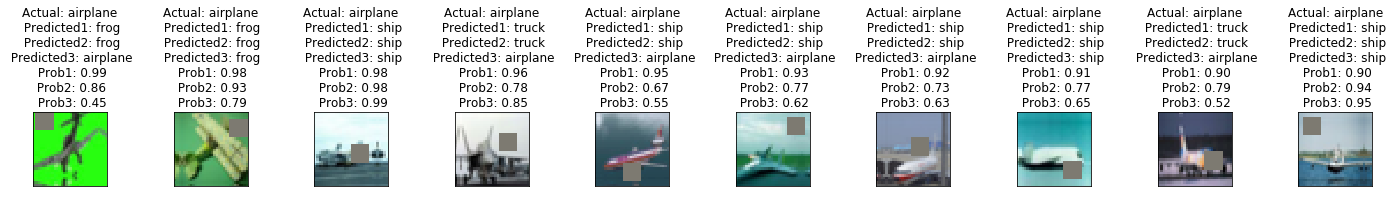

In [24]:
visual_utils.plot_good_and_worst(df=all_df, sm_col="sm1_correct", sm_class="sm1_class", sm_prob="sm1_probs",
              img_col="imgs",
              true_col="ys", 
              ncols=10,
              denormalize=True,
              CLASSWISE_SELECT_TOP_IMAGES = 10)

**Confusion matrix for softmax1**

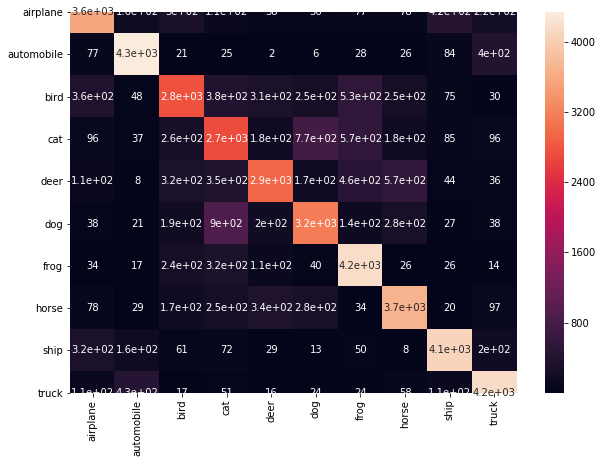

In [25]:
visual_utils.plot_cm(all_df.ys, all_df.sm1_class)

**Softmax2- Good and worse predictions**

predicted1 and prob1-softmax1
predicted2 and prob2-softmax2
predicted3 and prob3-softmax3

(2000, 14) (2000, 14)

Class: truck-Correct with high confidence



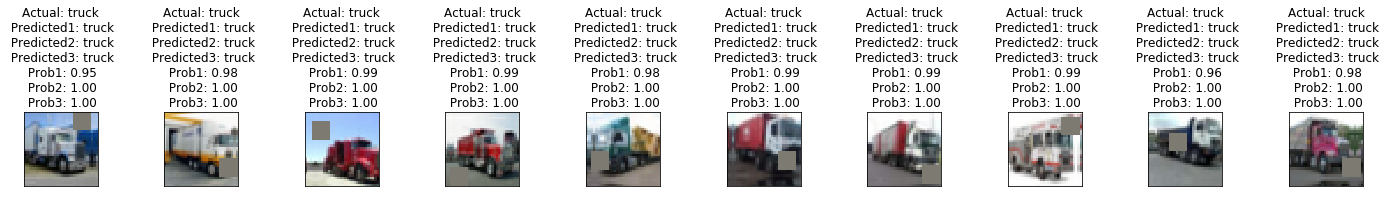


Class: truck-Incorrect with high confidence



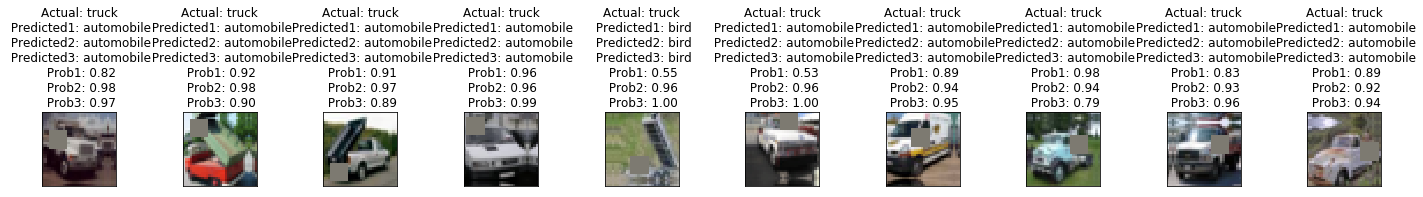


Class: ship-Correct with high confidence



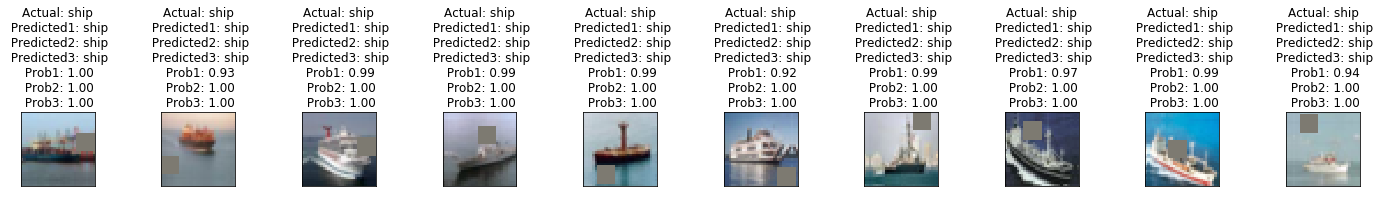


Class: ship-Incorrect with high confidence



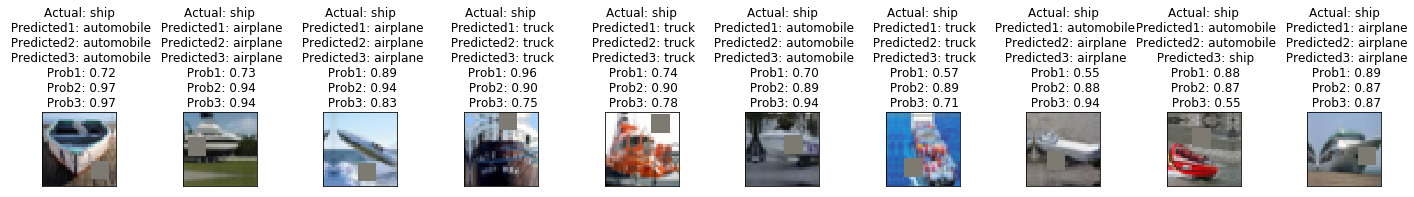


Class: horse-Correct with high confidence



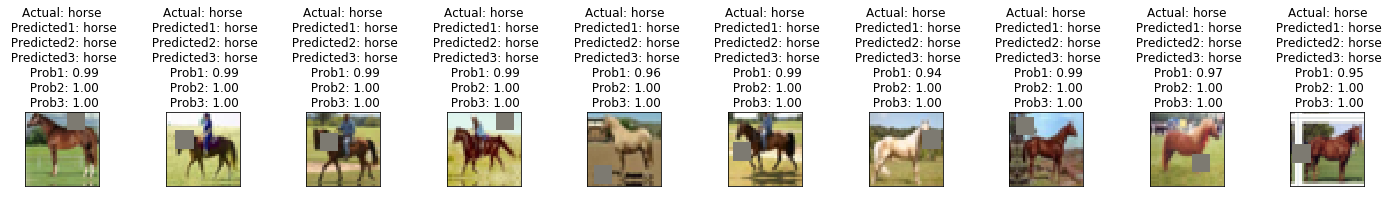


Class: horse-Incorrect with high confidence



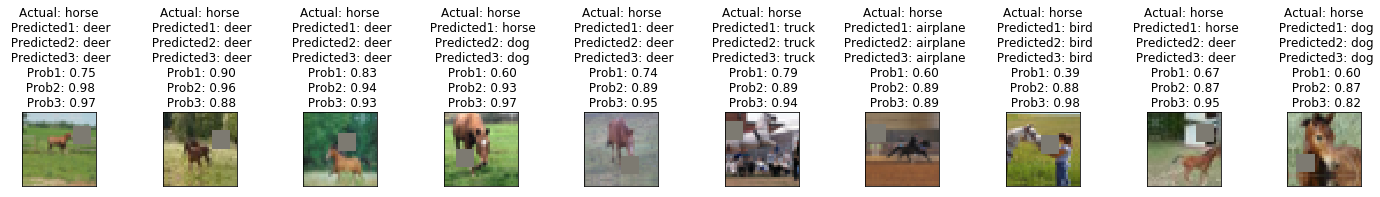


Class: frog-Correct with high confidence



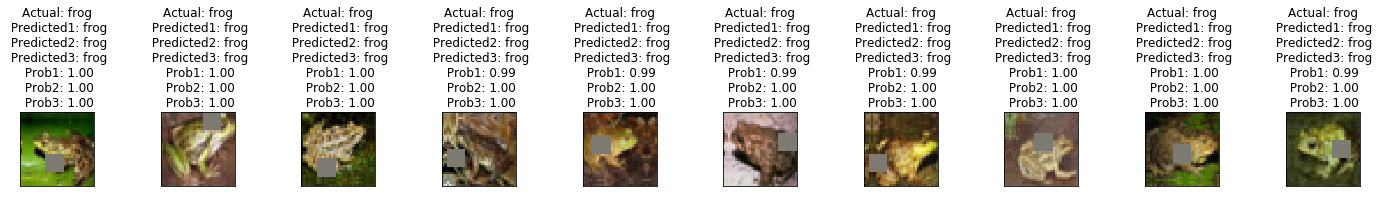


Class: frog-Incorrect with high confidence



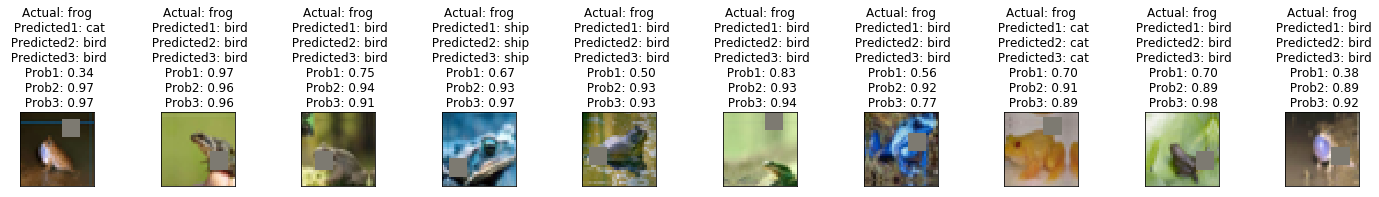


Class: dog-Correct with high confidence



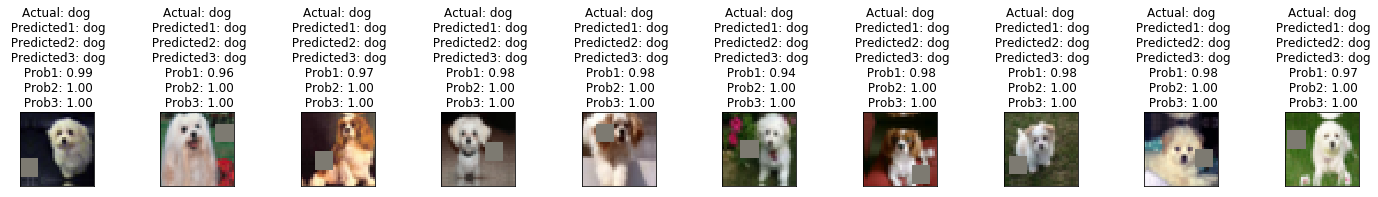


Class: dog-Incorrect with high confidence



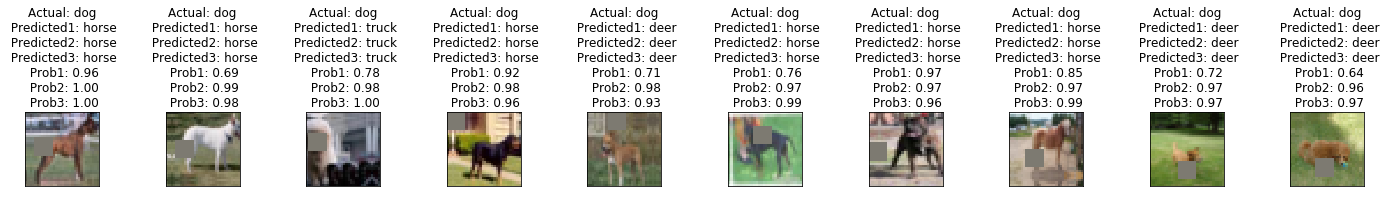


Class: deer-Correct with high confidence



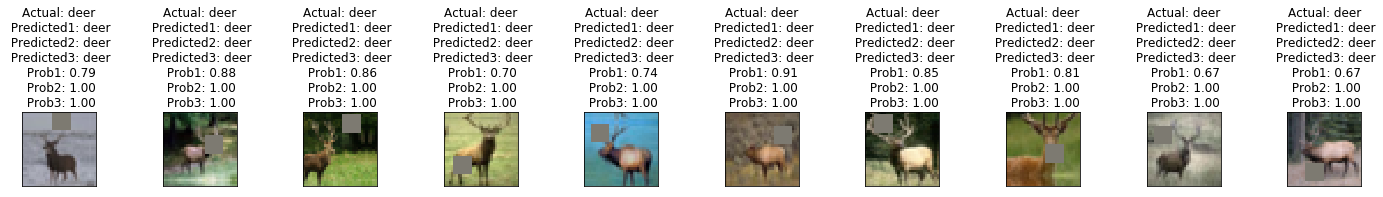


Class: deer-Incorrect with high confidence



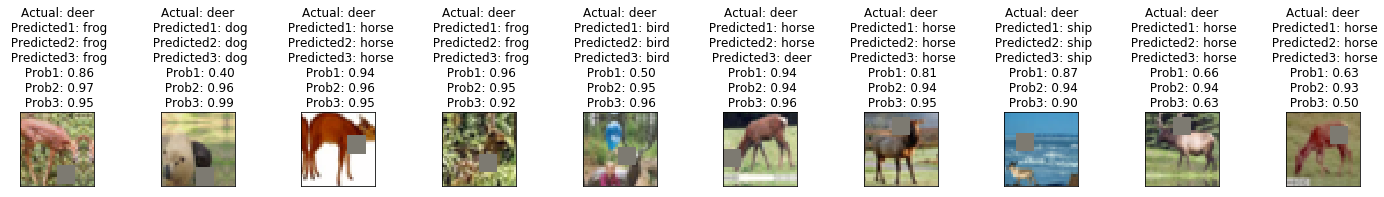


Class: cat-Correct with high confidence



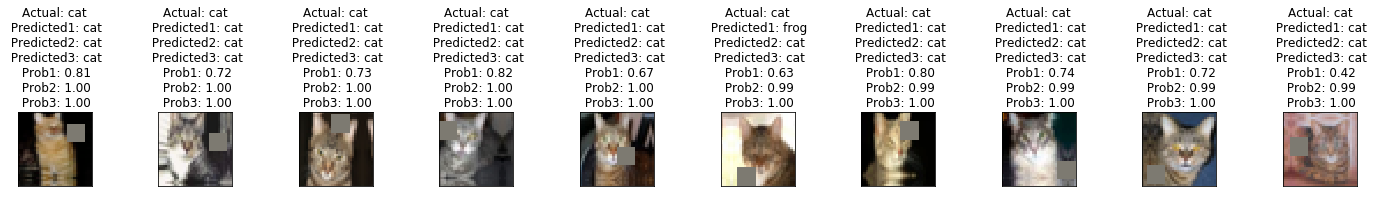


Class: cat-Incorrect with high confidence



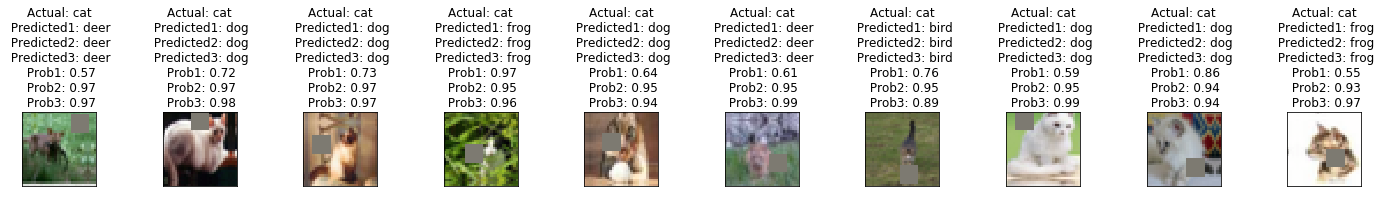


Class: bird-Correct with high confidence



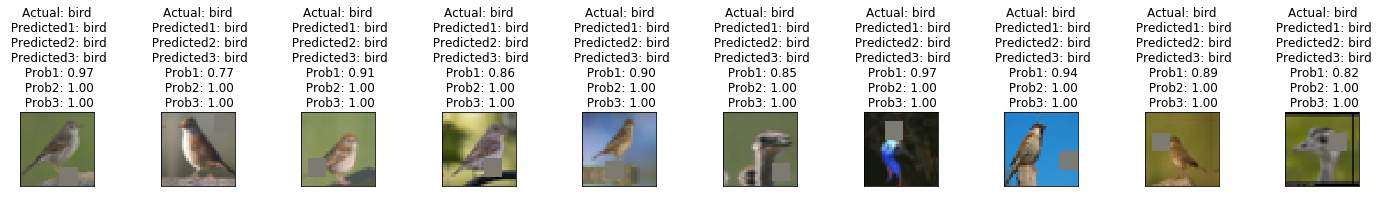


Class: bird-Incorrect with high confidence



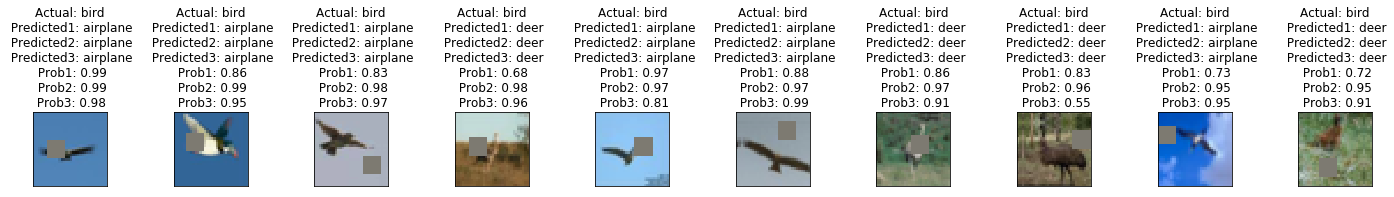


Class: automobile-Correct with high confidence



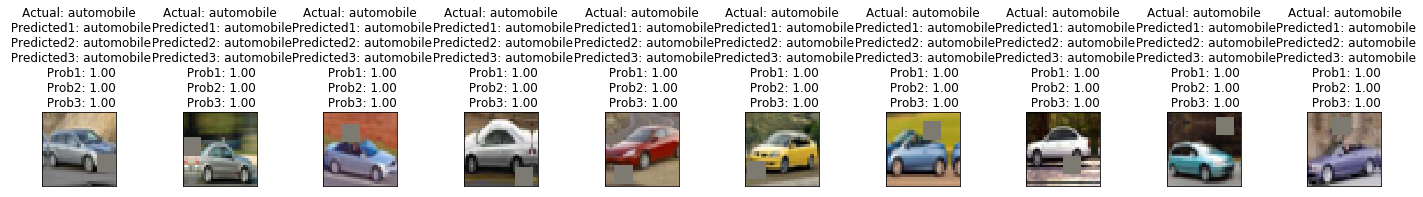


Class: automobile-Incorrect with high confidence



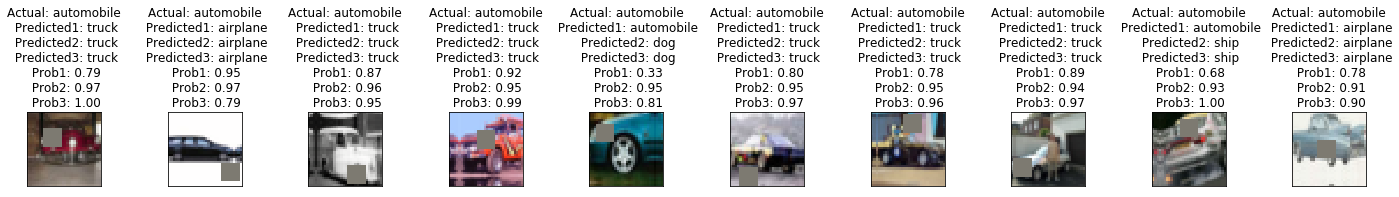


Class: airplane-Correct with high confidence



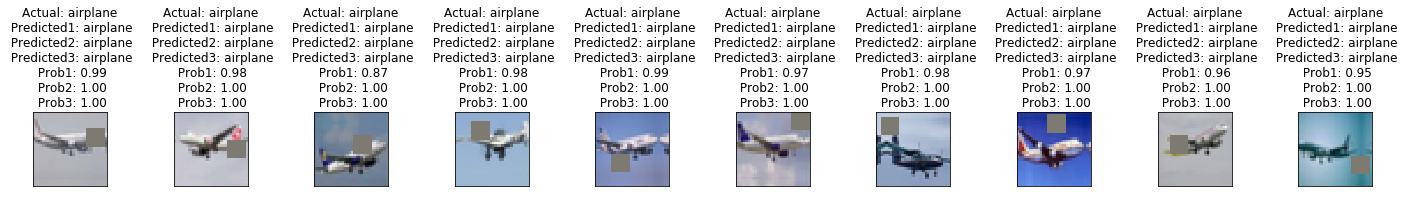


Class: airplane-Incorrect with high confidence



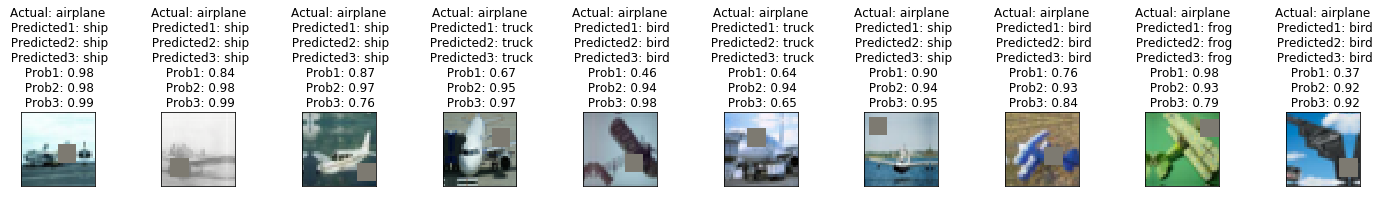

In [26]:
print("\
predicted1 and prob1-softmax1\n\
predicted2 and prob2-softmax2\n\
predicted3 and prob3-softmax3\n\
")

visual_utils.plot_good_and_worst(df=all_df, sm_col="sm2_correct", sm_class="sm2_class", sm_prob="sm2_probs",
              img_col="imgs",
              true_col="ys", 
              ncols=10,
              denormalize=True,
              CLASSWISE_SELECT_TOP_IMAGES = 10)

**Confusion matrix for softmax2**

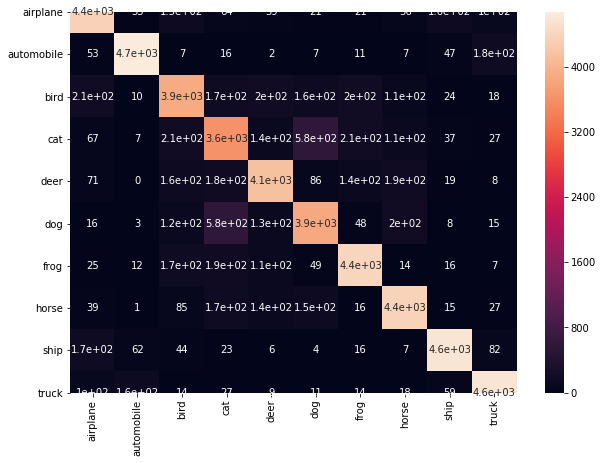

In [27]:
visual_utils.plot_cm(all_df.ys, all_df.sm2_class)

# Logs

In [28]:
import pandas as pd

pd.read_csv("../data/run_logger.csv").tail()

total_model_parameters  ...                                  comments
117                  343264  ...                          GRID SEARCH RUNS
118                  343264  ...                          GRID SEARCH RUNS
119                  343264  ...                          GRID SEARCH RUNS
120                 7764928  ...  Davidnet multi_inference voting accuracy
121                 7764928  ...  Davidnet multi_inference voting accuracy

[5 rows x 17 columns]

In [29]:
obj.model.summary()

Model: "zee_dense_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_bn_rl_3 (ConvBnRl)      multiple                  1984      
_________________________________________________________________
res_blk (ResBlk)             multiple                  370176    
_________________________________________________________________
res_blk_1 (ResBlk)           multiple                  1477632   
_________________________________________________________________
res_blk_2 (ResBlk)           multiple                  5904384   
_________________________________________________________________
zee_conv_blk (ZeeConvBlk)    multiple                  5632      
_________________________________________________________________
global_max_pooling2d (Global multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                

ValueError: ignored